<a href="https://colab.research.google.com/github/basukala/advance-house-price-prediction/blob/main/AdvanceHousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Business Case:-Prediciting the SalePrice of Houses with given features using advance regression technique

## Load Packages

In [4]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Load data into DataFrame

In [6]:
#display all columns of a Pandas DataFrame
pd.set_option('display.max_columns', 81)
df=pd.read_csv("/content/drive/MyDrive/dataset/data.csv")

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

### Checking shape,statistical information and types of data

In [8]:
df.shape

(1460, 81)

In [9]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Checking Null values

In [11]:
print(df.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [12]:
for column in df.columns: 
    print(column, df[column].isnull().sum())  #check null value for each column and return of total no of null value      

Id 0
MSSubClass 0
MSZoning 0
LotFrontage 259
LotArea 0
Street 0
Alley 1369
LotShape 0
LandContour 0
Utilities 0
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
BldgType 0
HouseStyle 0
OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
RoofStyle 0
RoofMatl 0
Exterior1st 0
Exterior2nd 0
MasVnrType 8
MasVnrArea 8
ExterQual 0
ExterCond 0
Foundation 0
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinSF1 0
BsmtFinType2 38
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0
Heating 0
HeatingQC 0
CentralAir 0
Electrical 1
1stFlrSF 0
2ndFlrSF 0
LowQualFinSF 0
GrLivArea 0
BsmtFullBath 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
KitchenQual 0
TotRmsAbvGrd 0
Functional 0
Fireplaces 0
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageCars 0
GarageArea 0
GarageQual 81
GarageCond 81
PavedDrive 0
WoodDeckSF 0
OpenPorchSF 0
EnclosedPorch 0
3SsnPorch 0
ScreenPorch 0
PoolArea 0
PoolQC 1453
Fence 1179
MiscFeature 1406
MiscVal 0
MoSold 0
YrSol

### Checking for Duplicated values

In [13]:
df.duplicated().sum()

0

### Categorical Data list

In [14]:
#The method .copy() is used here so that any changes made in new DataFrame don't get reflected in the original one
df_categorical = df.select_dtypes(include=['object']).copy()
#df_categorical.iloc[40:70]
#df_categorical[df_categorical['BsmtQual'].isna()]
df_categorical.head(5)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


### Numerical Data list

In [15]:
df_numerical =df.select_dtypes(exclude=['object']).copy()
df_numerical.head()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [16]:
uniqueVal=[]
for column in df_numerical:
    uniqueVal=df_numerical[column].value_counts()
    print('{}: {}'.format(column,df_numerical[column].nunique()) +"\n",uniqueVal)
    

Id: 1460
 1       1
982     1
980     1
979     1
978     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: Id, Length: 1460, dtype: int64
MSSubClass: 15
 20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
LotFrontage: 110
 60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64
LotArea: 1073
 7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17104     1
9717      1
Name: LotArea, Length: 1073, dtype: int64
OverallQual: 10
 5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64
OverallCond: 9
 5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5

### Imputing the missing values 

In [17]:
def fill_missingVal(data,limit):
    obj = data.isnull().sum()
    for key,value in obj.iteritems():
        
        if (value>0):
            if(value<limit):
                #print(df_categorical[key].mode())
                if(data[key].dtypes=='object'):
                    data[key] = data[key].fillna(data[key].mode()[0])
                else:
                    data[key] = data[key].fillna(data[key].mean())
            else:
                data.drop([key],axis=1,inplace=True)

In [18]:
#fill up nan value with mode for Categorical data
fill_missingVal(df_categorical,700)

In [19]:
#fill up nan value with mode for Numerical data
fill_missingVal(df_numerical,700)

In [20]:
df_numerical.drop(['Id'],axis=1,inplace=True)

In [21]:
df_numerical.shape

(1460, 37)

In [22]:
df_categorical.shape

(1460, 39)

In [23]:
df_categorical.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [24]:
df_numerical.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

## Univariate Analysis

### Analysis for Numerical variables

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


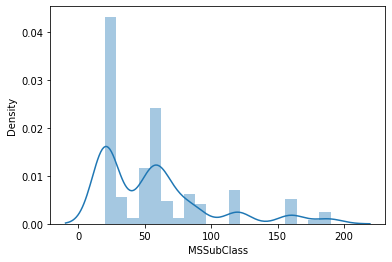

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


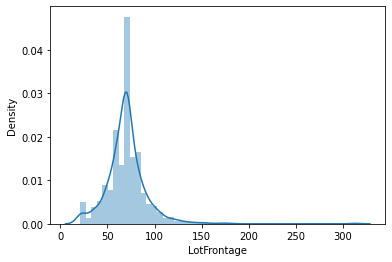

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


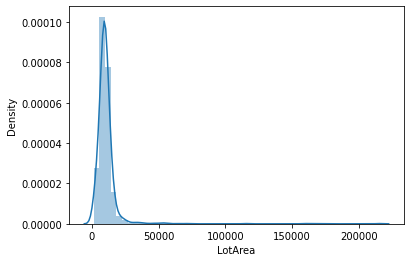

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


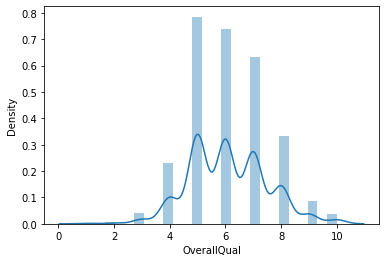

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


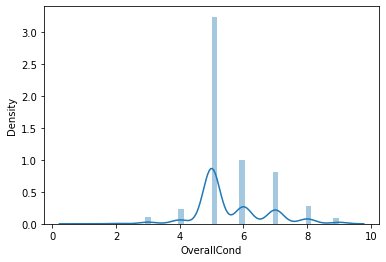

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


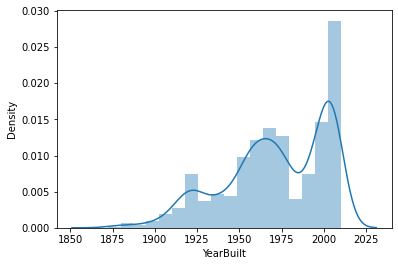

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


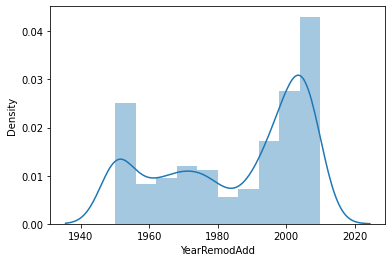

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


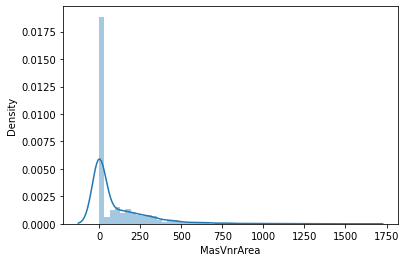

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


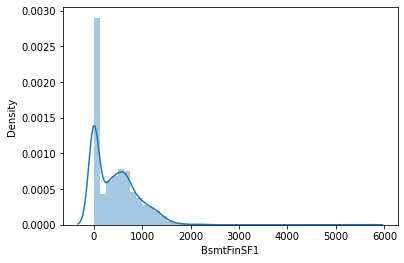

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


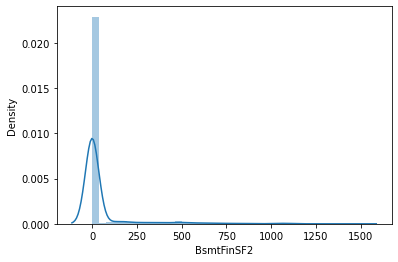

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


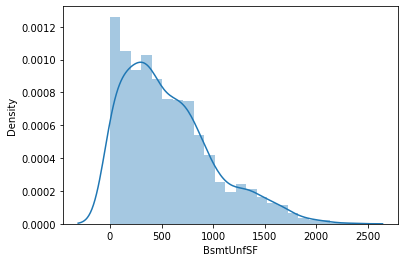

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


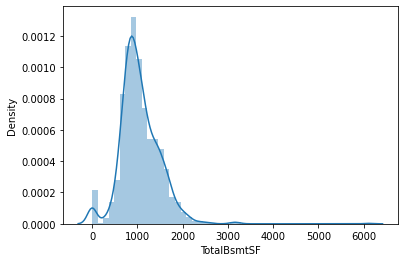

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


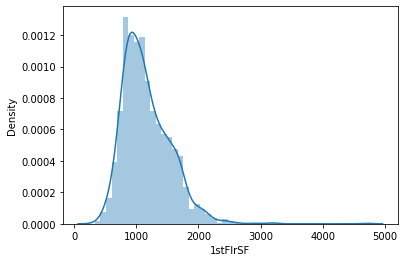

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


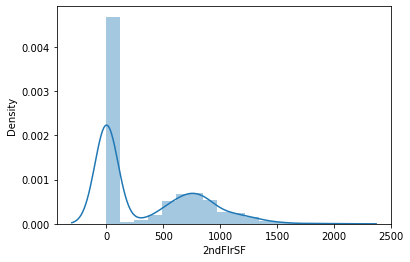

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


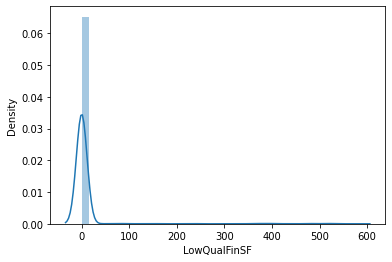

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


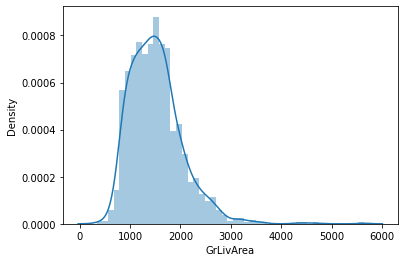

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


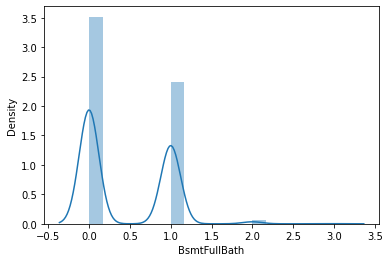

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


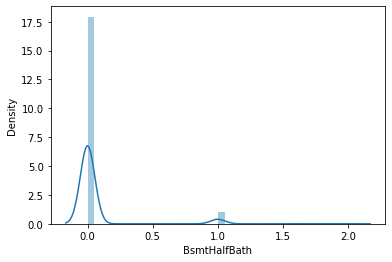

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


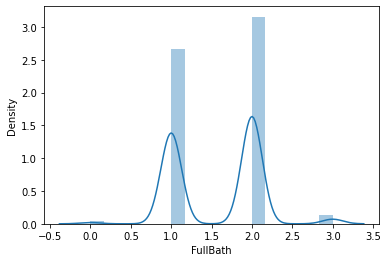

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


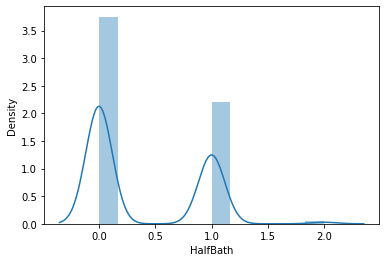

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


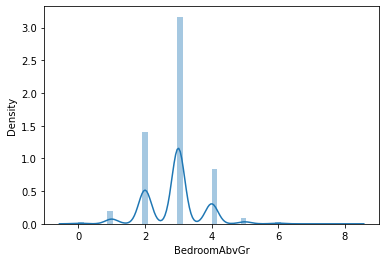

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


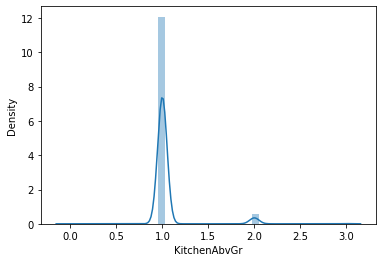

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


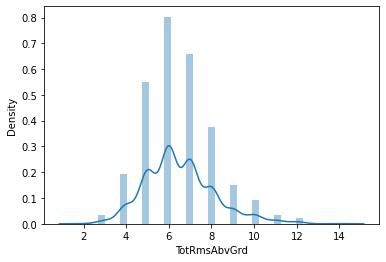

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


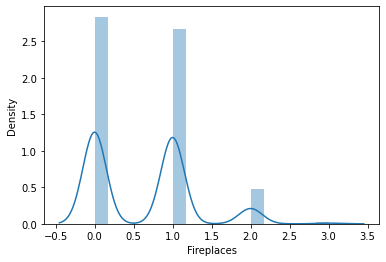

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


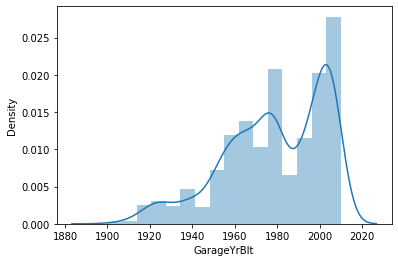

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


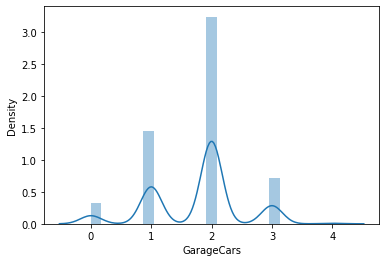

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


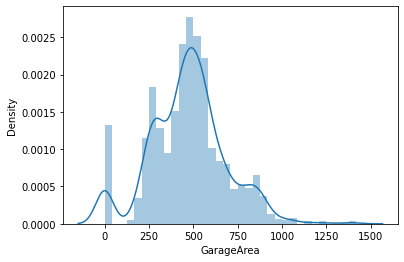

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


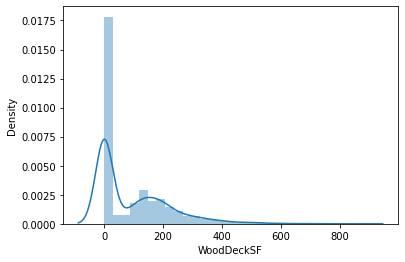

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


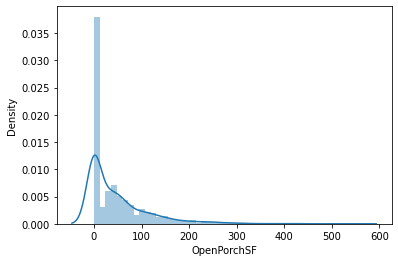

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


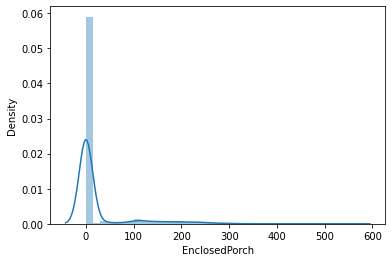

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


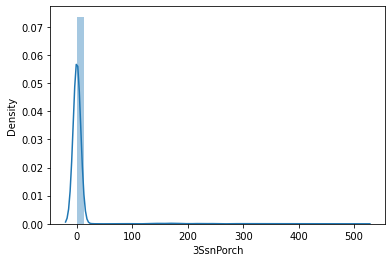

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


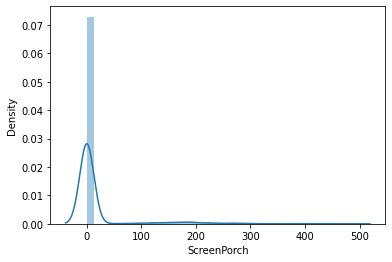

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


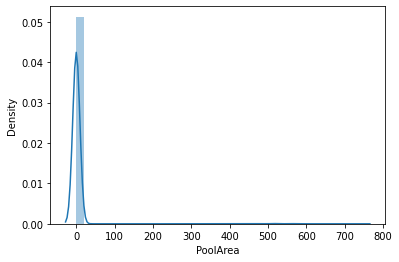

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


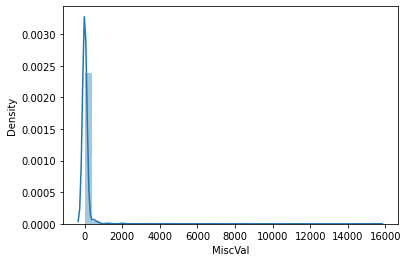

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


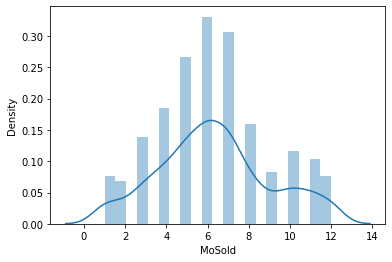

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


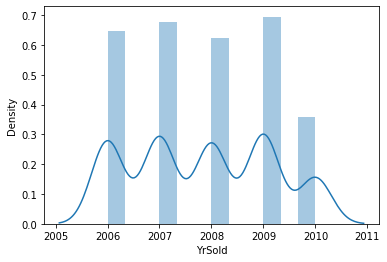

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


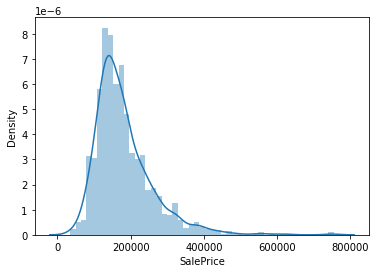

In [25]:
for i,k in df_numerical.iteritems():
    #print(df_numerical[i])
    sns.distplot(df_numerical[i].dropna(axis=0))
    plt.show()
   

### Find out the relationship between numerical variable and dependent variable

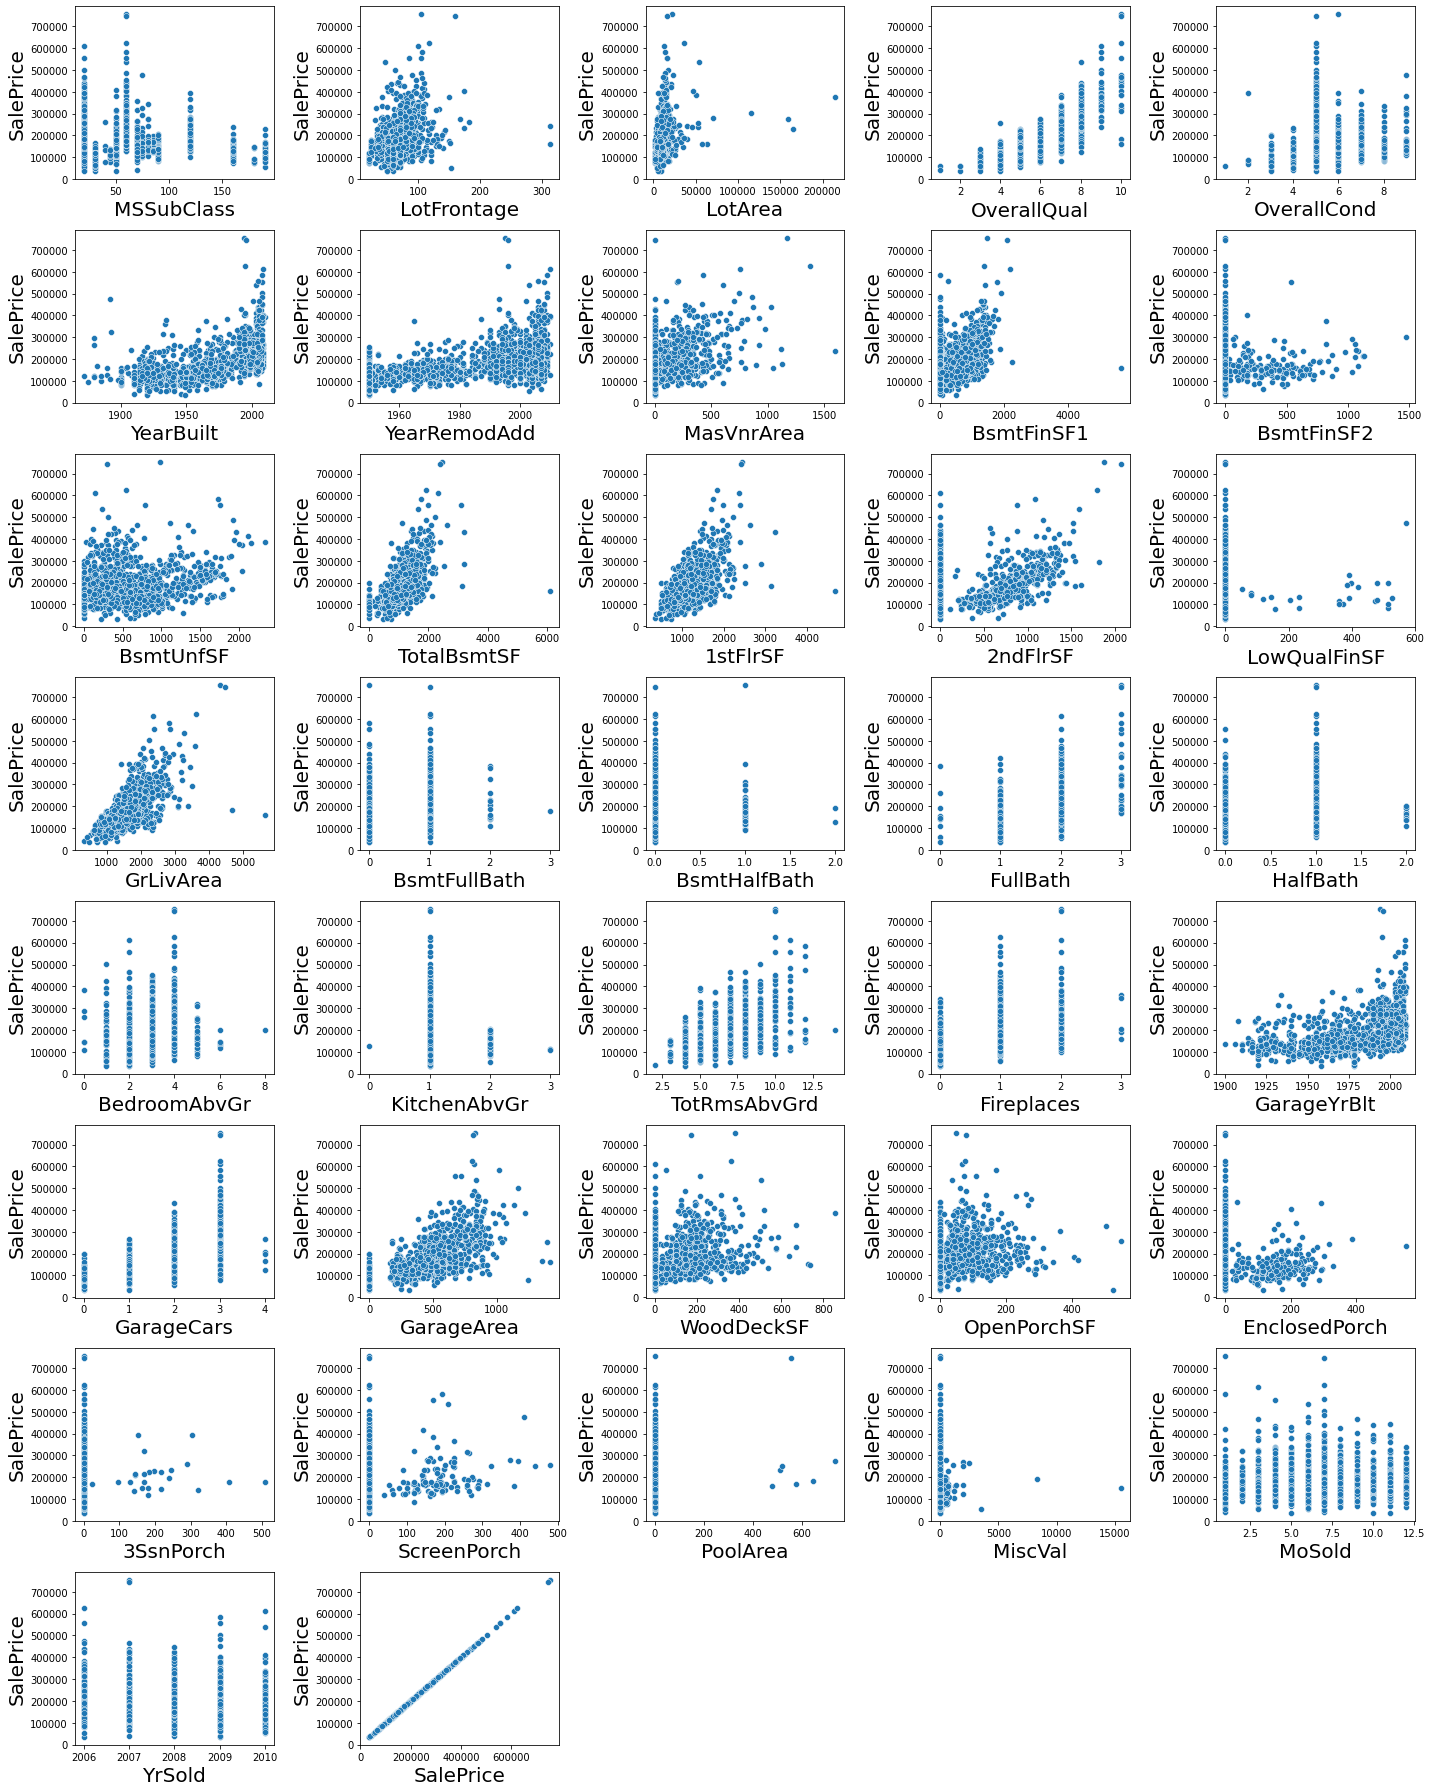

In [26]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df_numerical:
    if plotnumber<=40 :
        ax = plt.subplot(8,5,plotnumber) # rows,columns,current plot
        sns.scatterplot(x=df_numerical[column].dropna(axis=0)
                        ,y=df_numerical.SalePrice)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('SalePrice',fontsize=20)
    plotnumber+=1
plt.tight_layout()

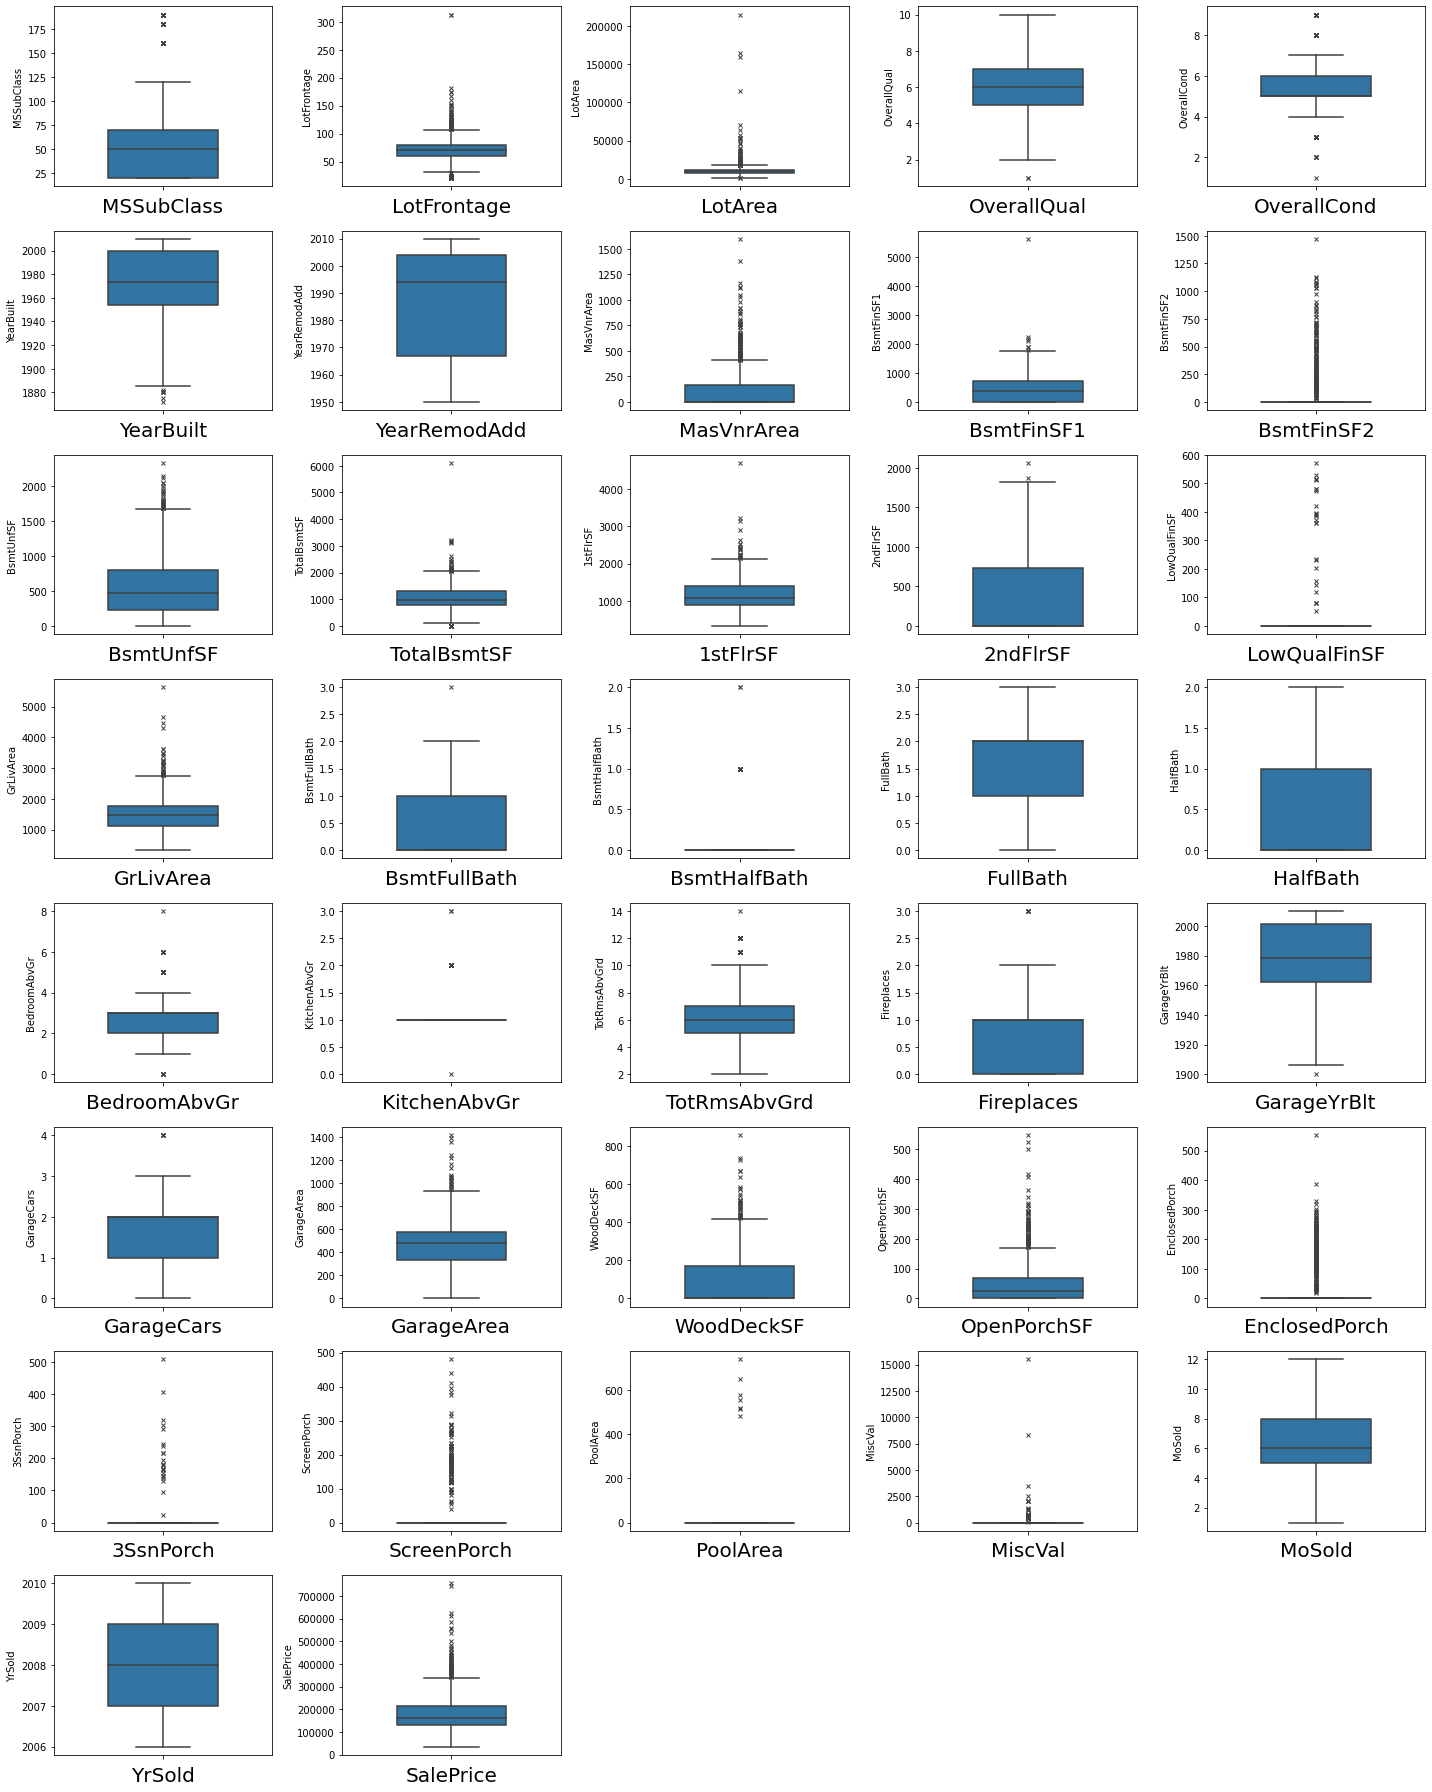

In [27]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for col in df_numerical:
    if plotnumber<=37:
        ax = plt.subplot(8,5,plotnumber) # rows,columns,current plot
        sns.boxplot(data = df_numerical, y = df_numerical[col], width= 0.5, flierprops = dict(marker = "x", markersize = 3.5))
        plt.xlabel(col,fontsize=20)
        #plt.ylabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

### Analysis for Categorical variables

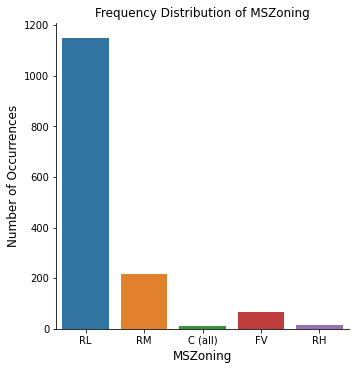

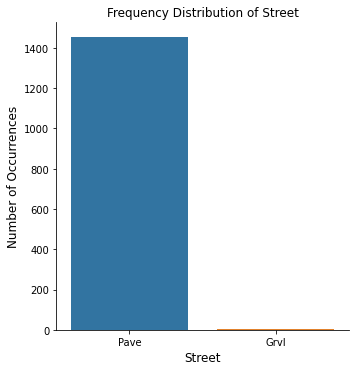

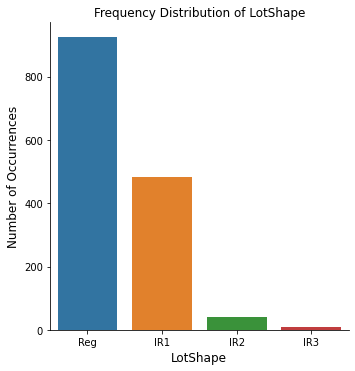

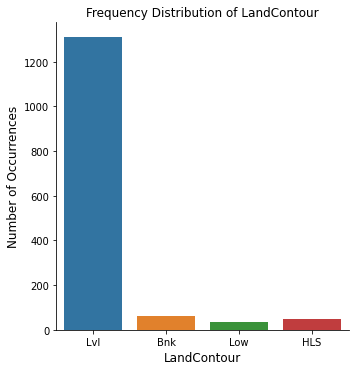

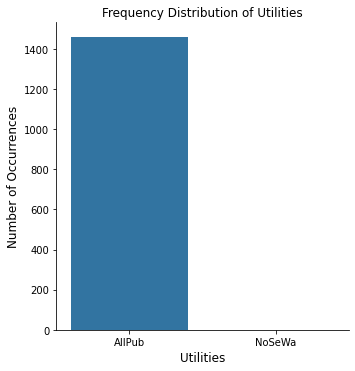

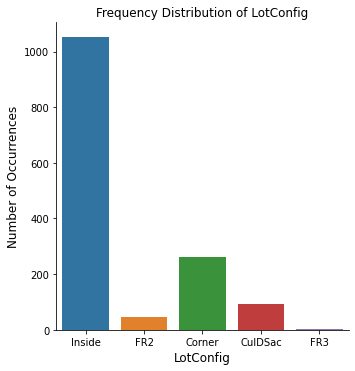

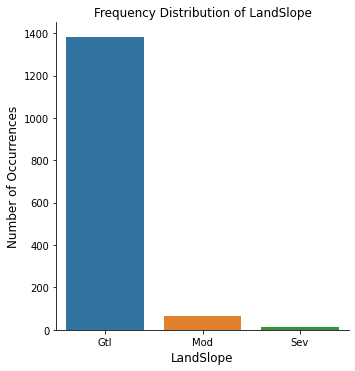

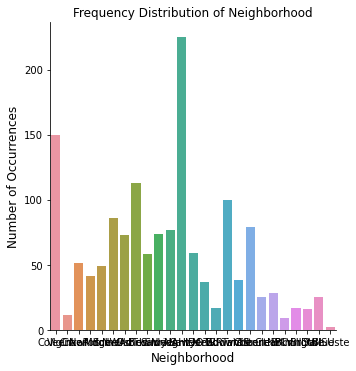

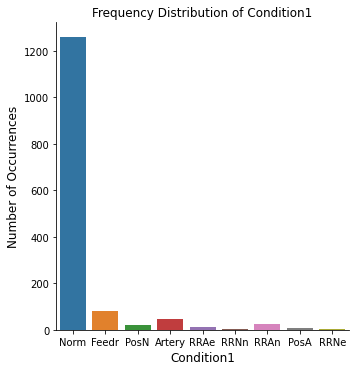

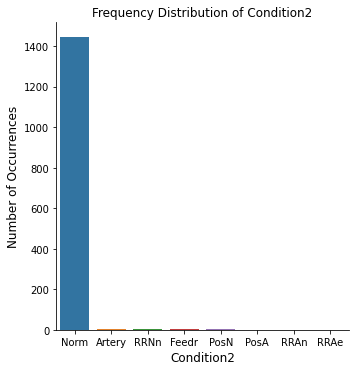

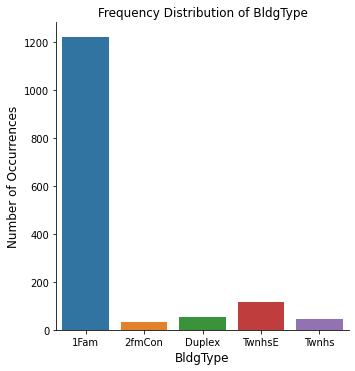

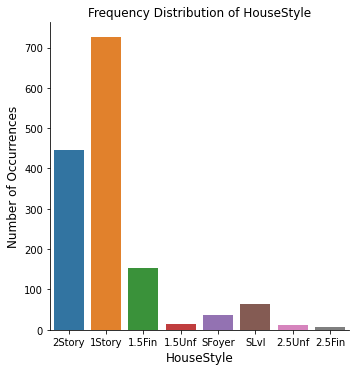

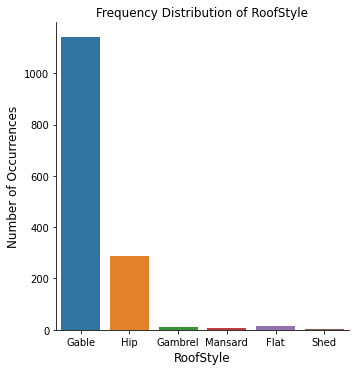

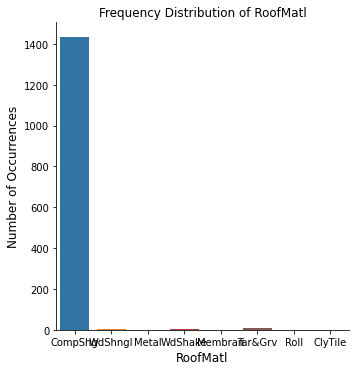

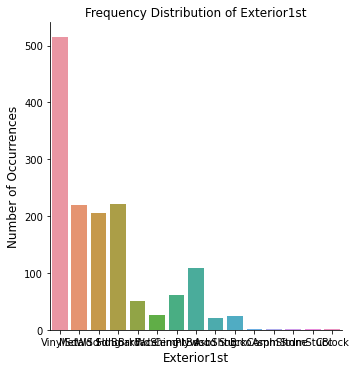

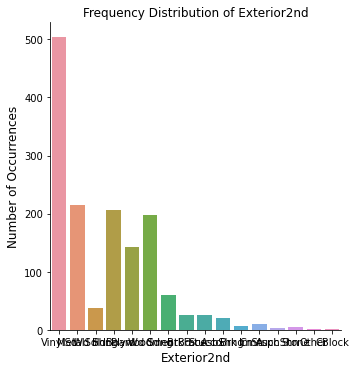

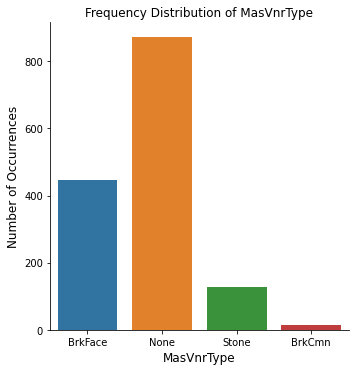

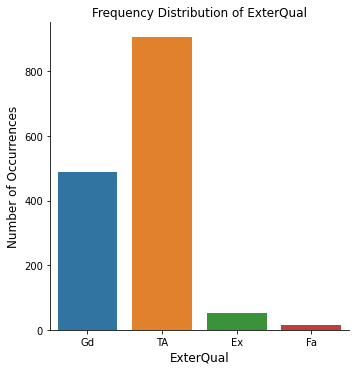

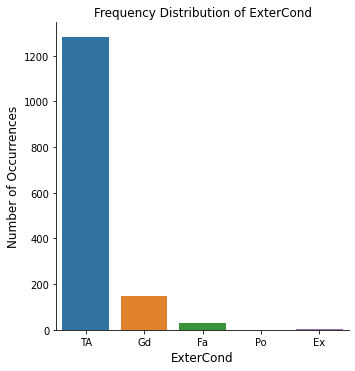

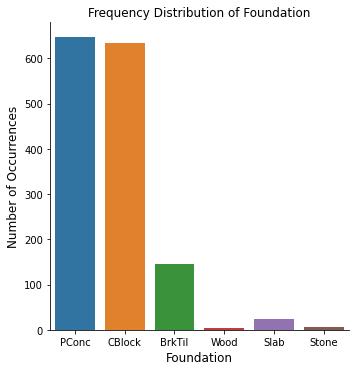

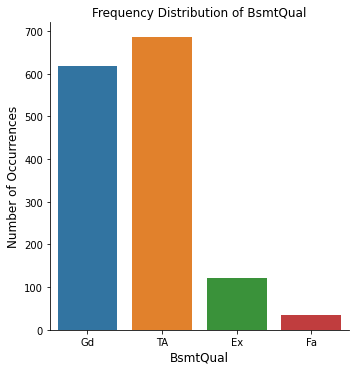

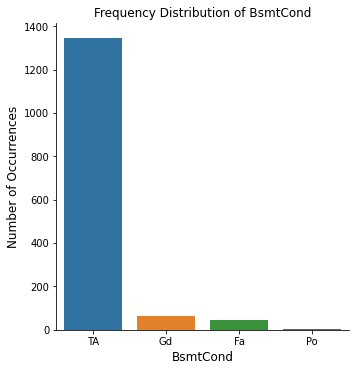

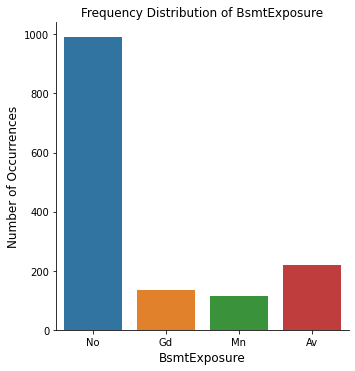

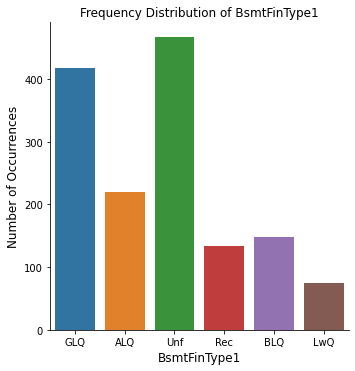

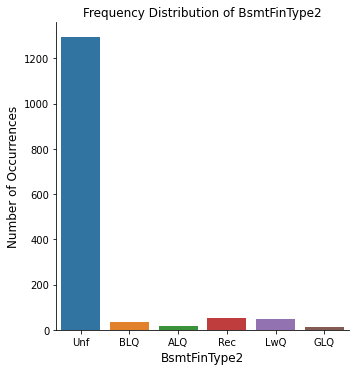

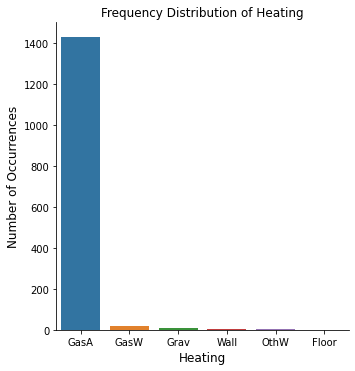

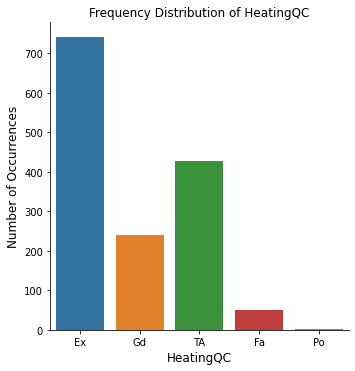

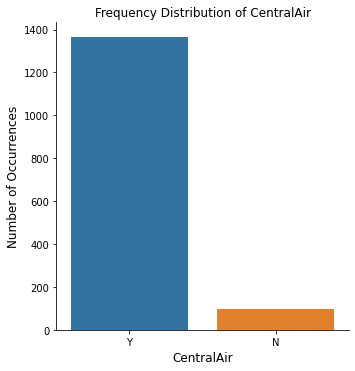

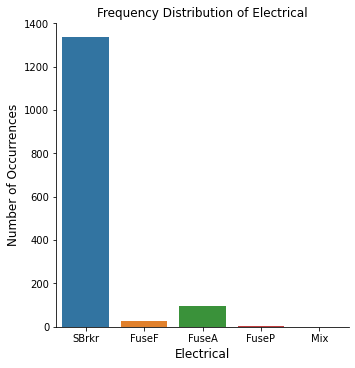

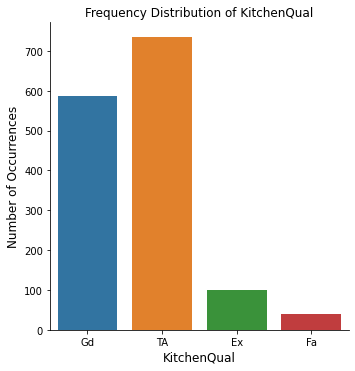

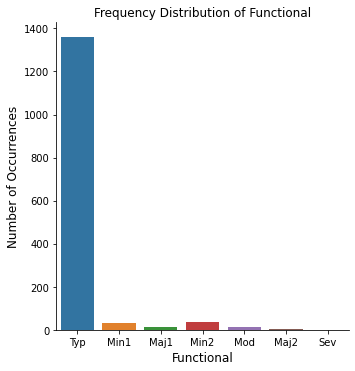

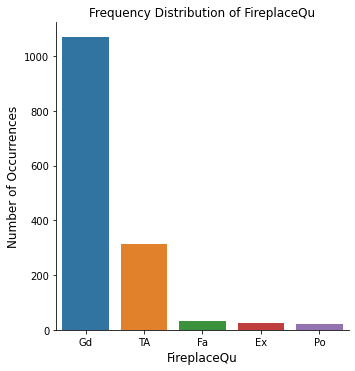

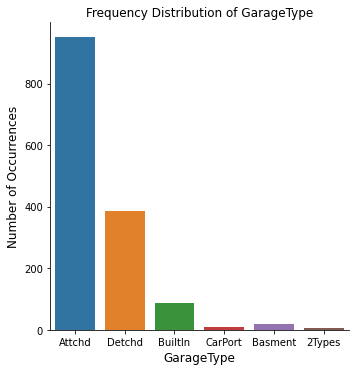

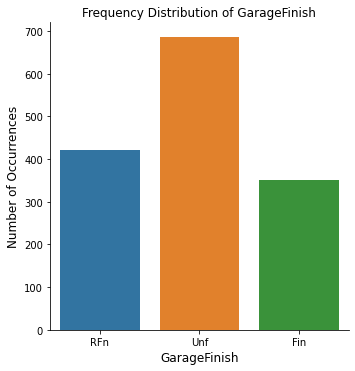

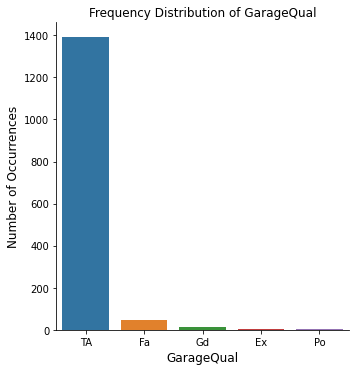

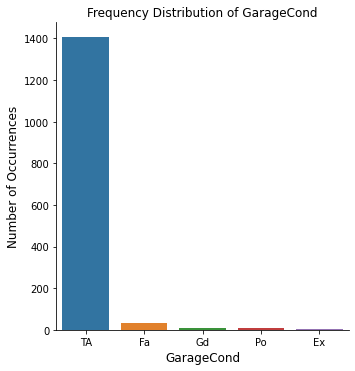

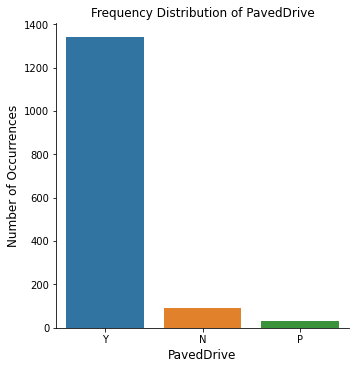

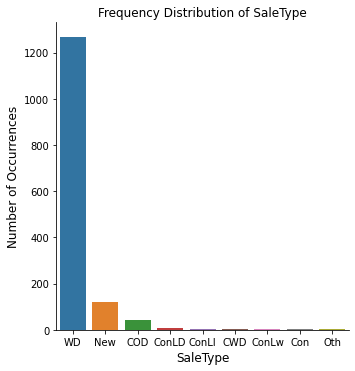

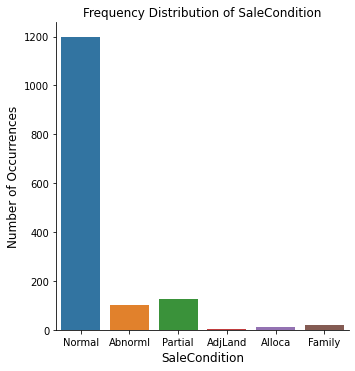

In [28]:
for i,k in df_categorical.iteritems():
    #mszoning_count = df['MSZoning'].value_counts()
    #sns.barplot(mszoning_count.index, mszoning_count.values,palette="crest")
    sns.catplot(x=i, data=df_categorical, kind='count');
    #plt.bar(mszoning_count.index, mszoning_count.values,color=['orange', 'red', 'green', 'blue', 'black'])
    plt.title('Frequency Distribution of '+i)
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel(i, fontsize=12)
    plt.show()

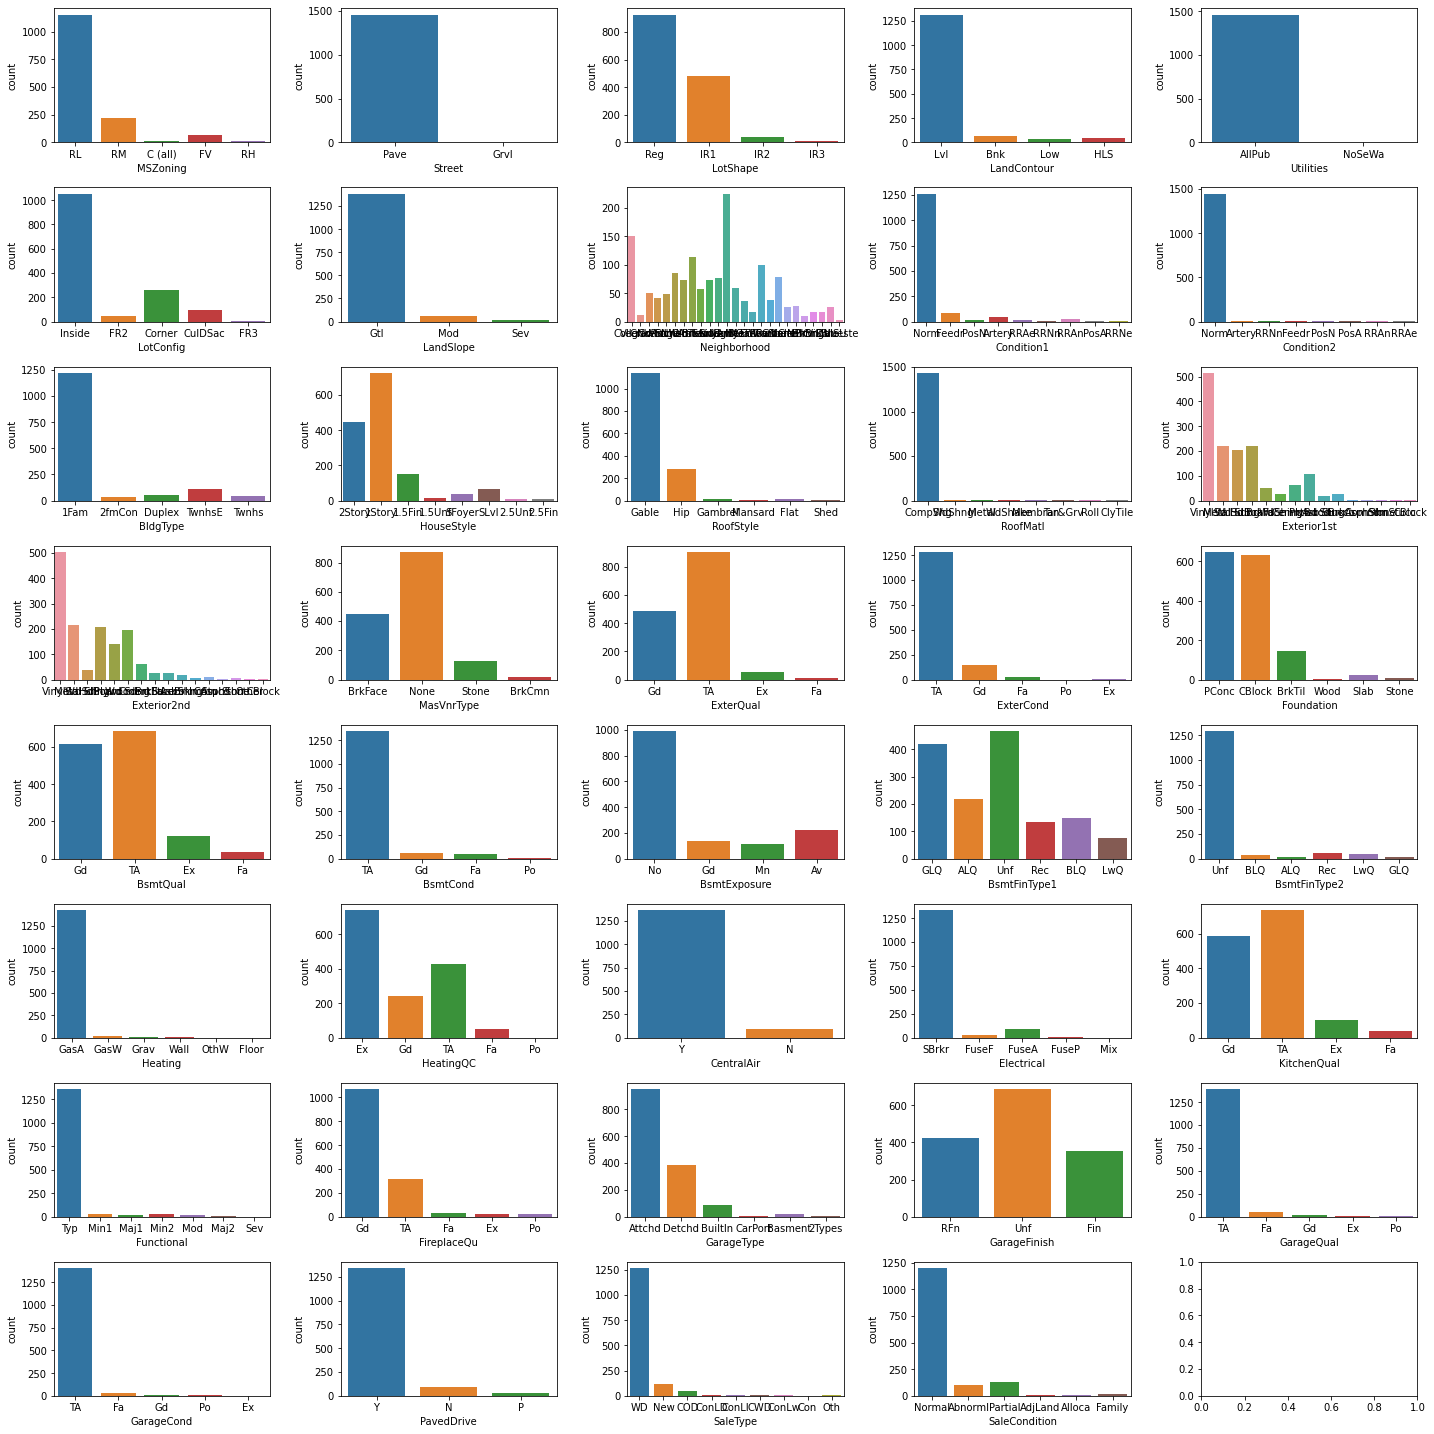

In [29]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
#categorical=[]
#for column in df_categorical:
#if is_string_dtype(df_categorical[column]):
#categorical.append(column)

categorical=df_categorical.columns.tolist()
fig, ax = plt.subplots(8, 5, figsize=(20, 20))

for data, subplot in zip(categorical, ax.flatten()):
    count = df_categorical[data].value_counts()
    sns.countplot(x=df_categorical[data], ax=subplot)    
    plt.tight_layout(pad=1)

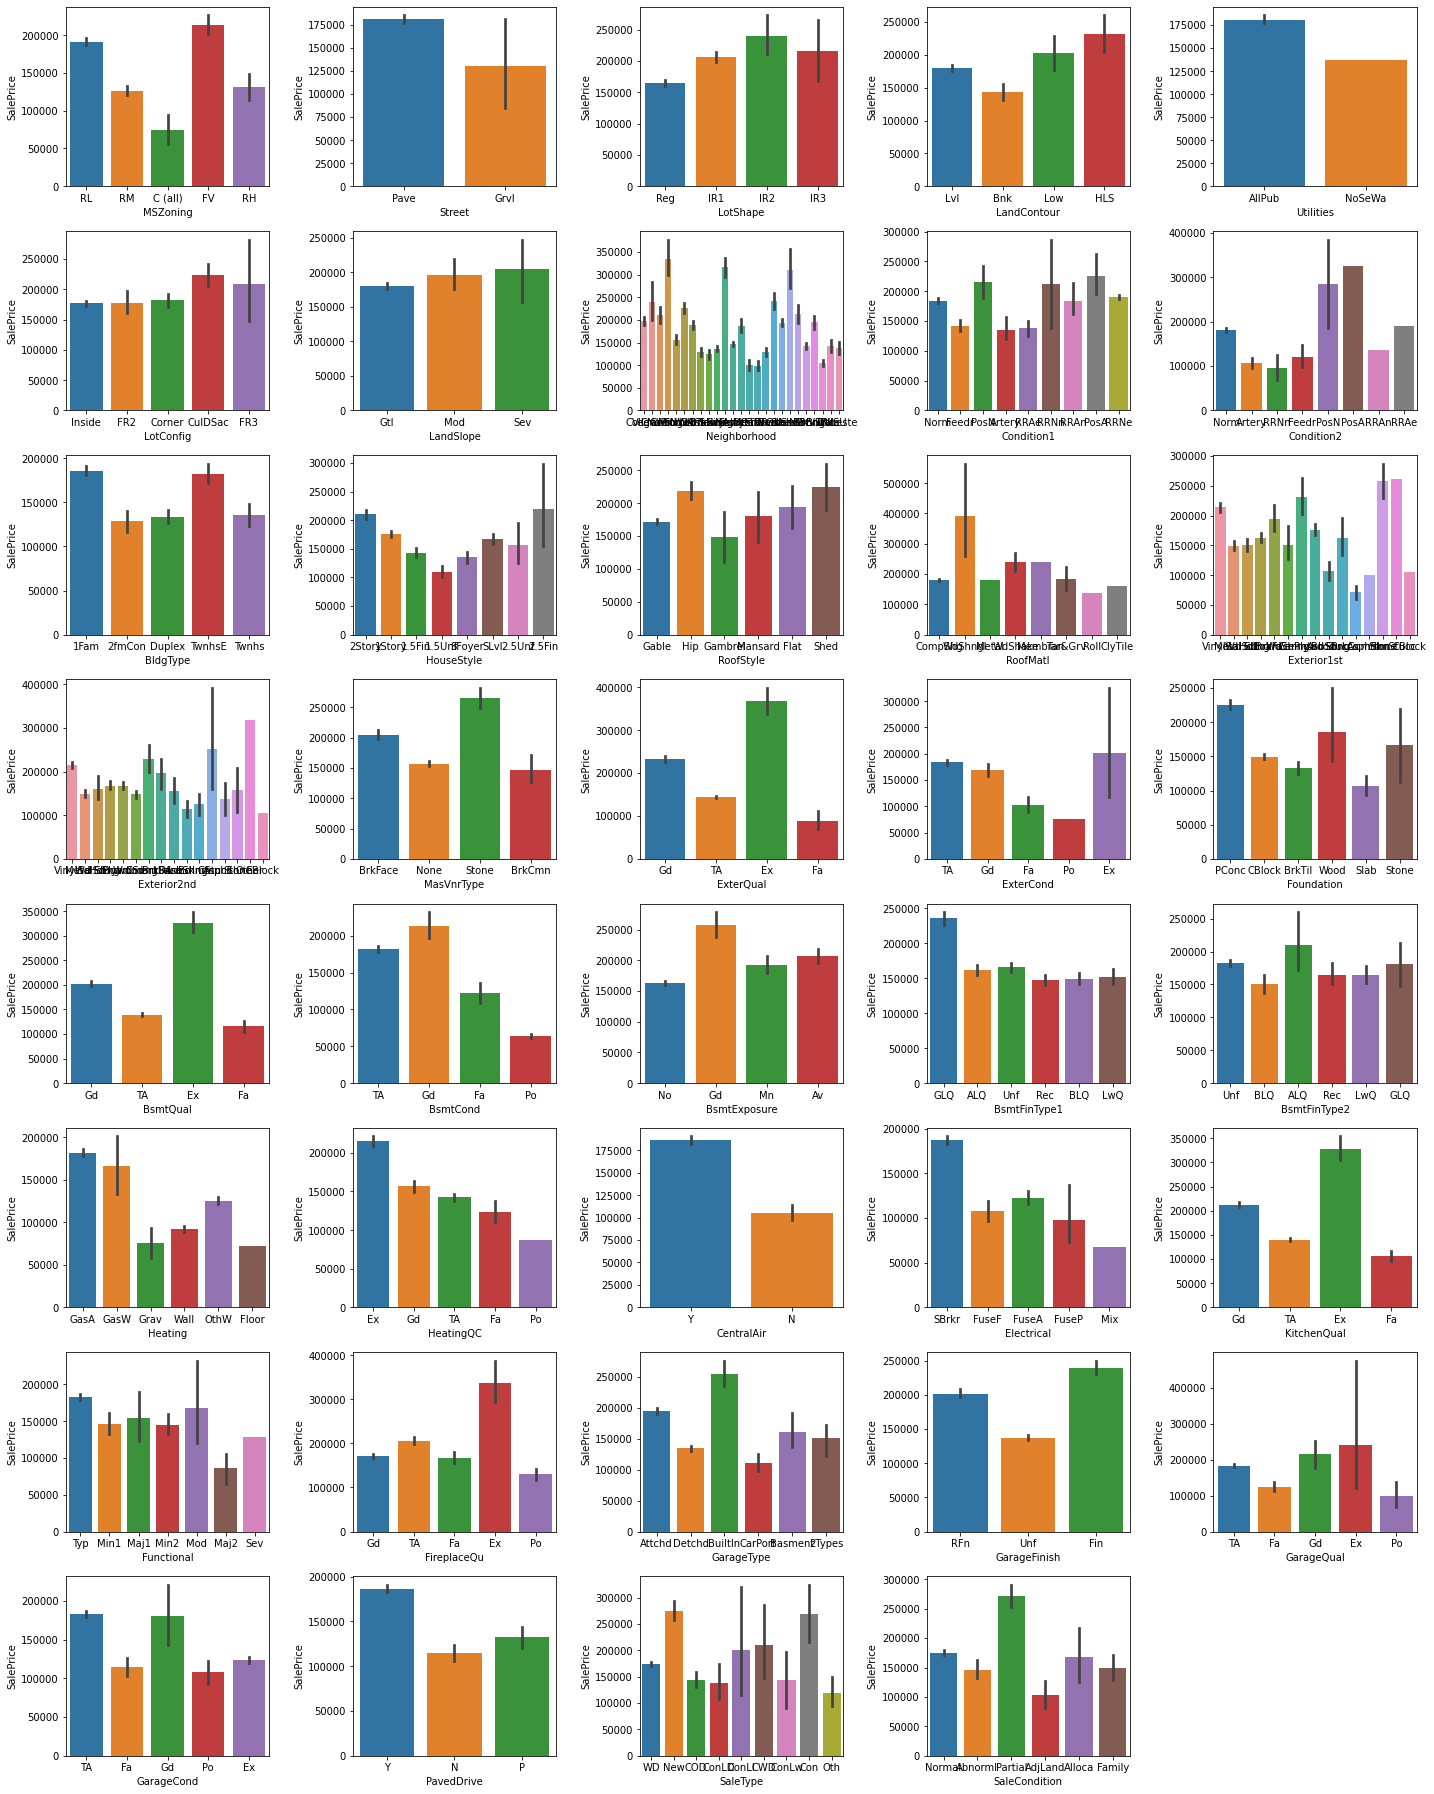

In [30]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for col in df_categorical:
    if plotnumber<=39 :
        ax = plt.subplot(8,5,plotnumber) # rows,columns,current plot
        sns.barplot(data = df_categorical, x = df_categorical[col], y = df_numerical['SalePrice'])
        plt.xlabel(col,fontsize=10)
        plt.ylabel('SalePrice',fontsize=10)
    plotnumber+=1
plt.tight_layout(pad=1)

### Find out the relationship between categorical variable and  dependent variable

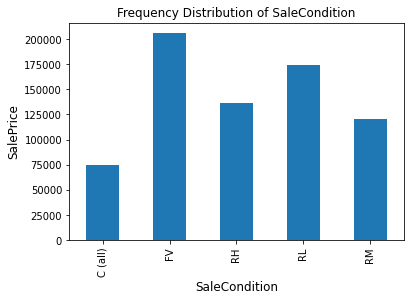

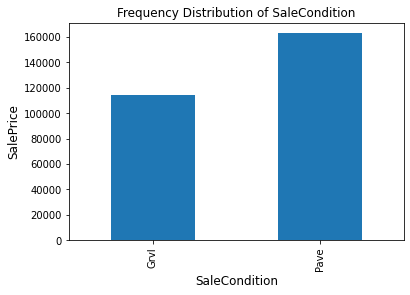

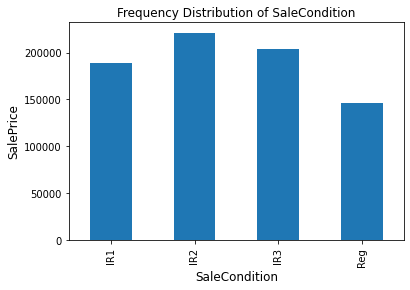

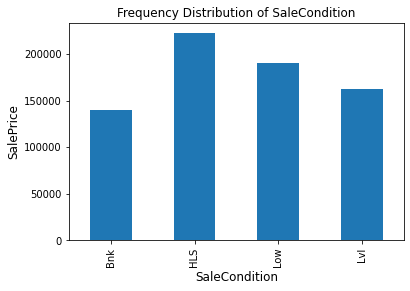

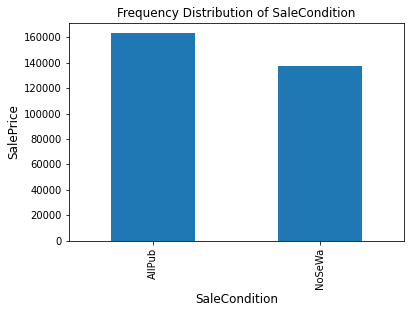

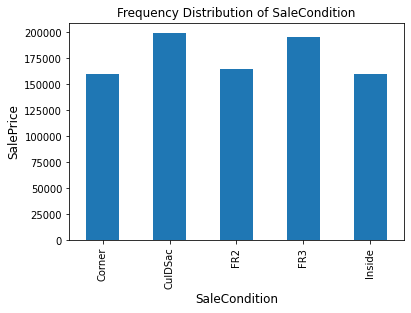

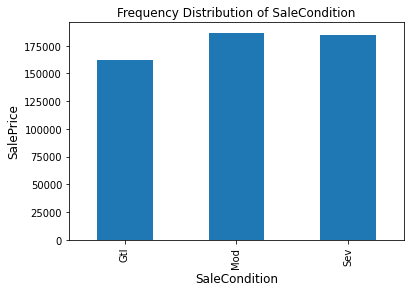

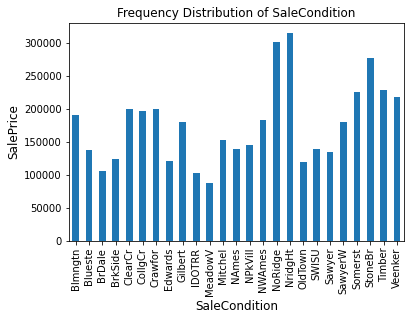

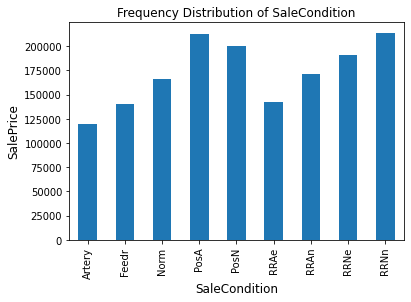

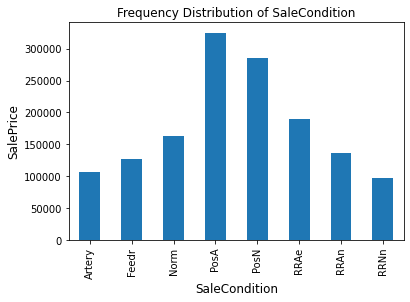

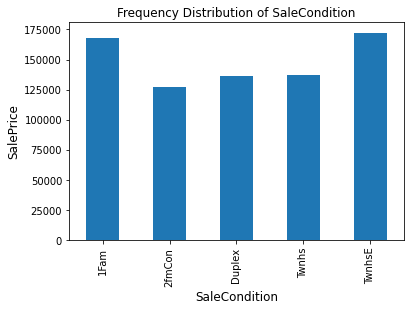

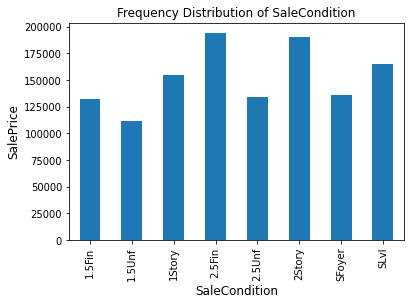

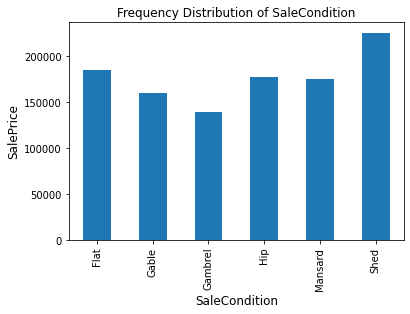

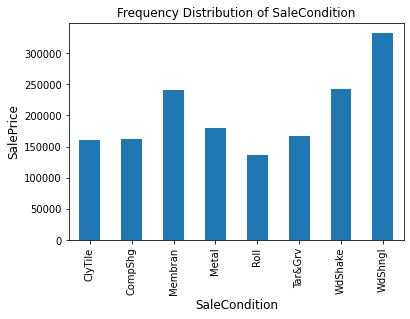

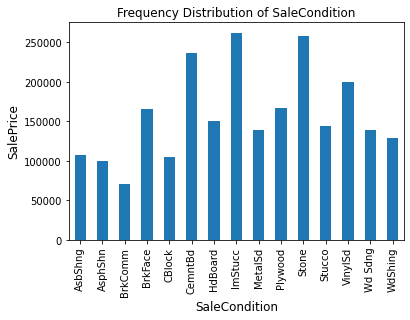

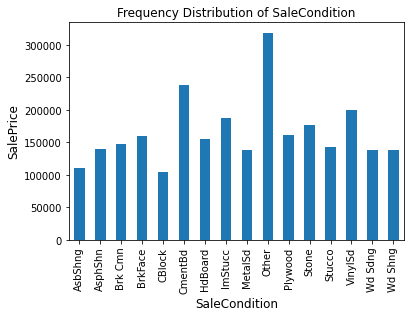

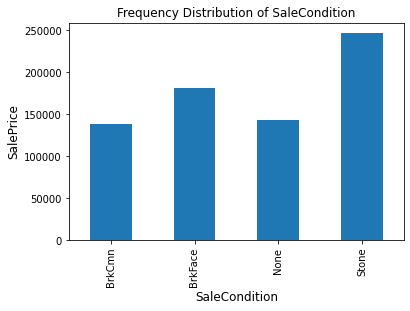

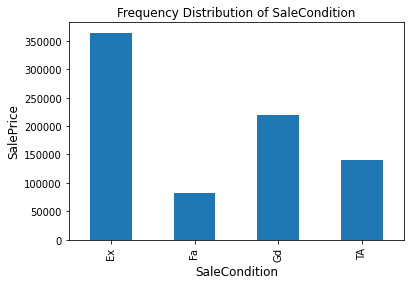

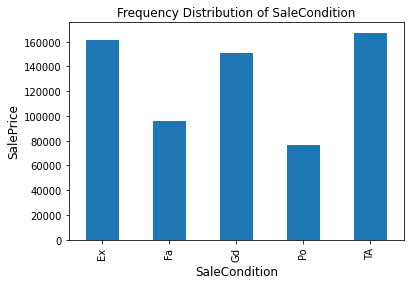

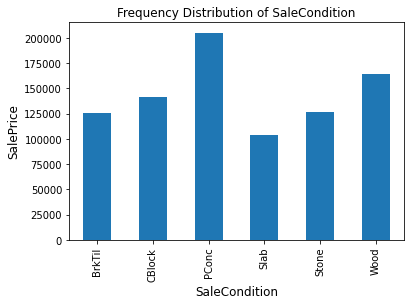

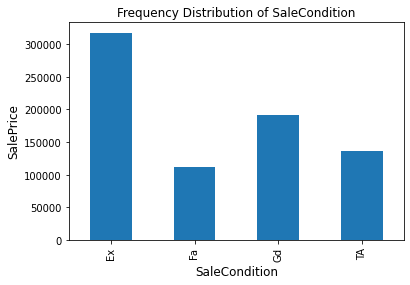

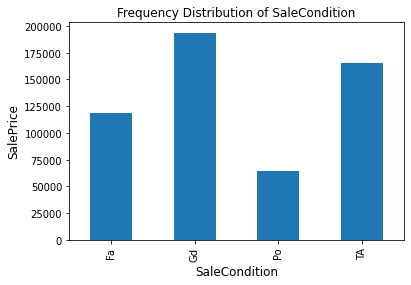

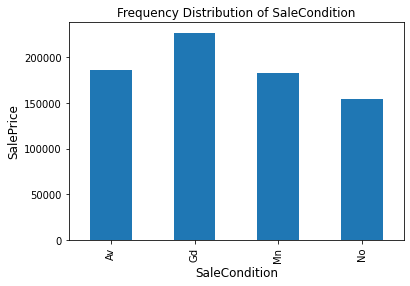

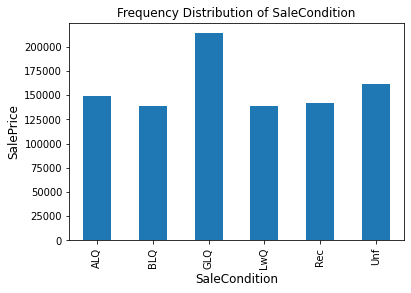

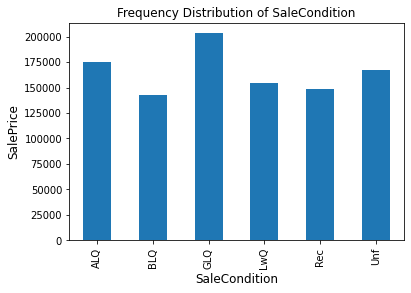

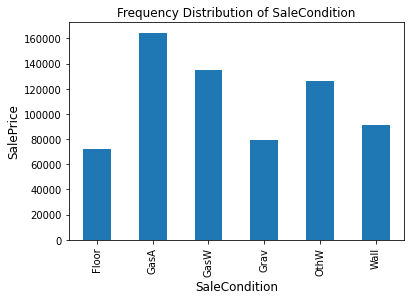

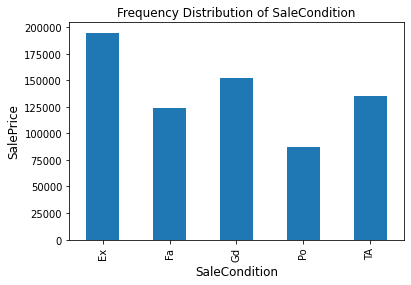

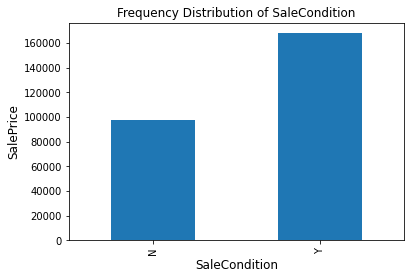

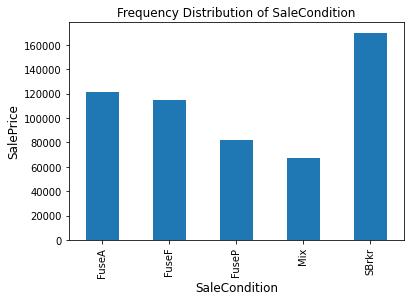

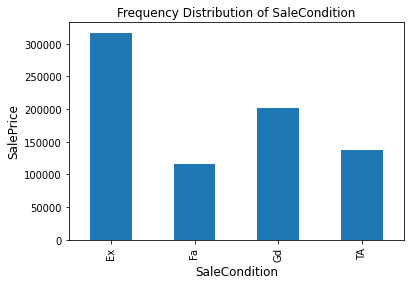

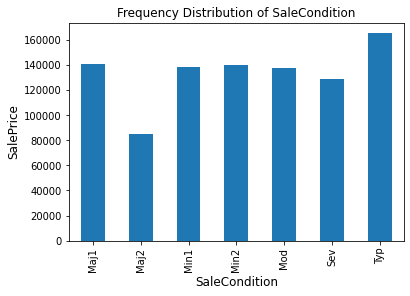

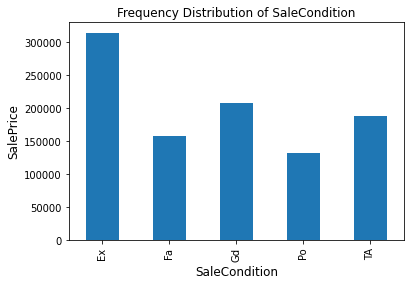

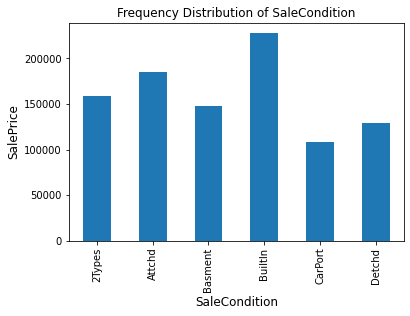

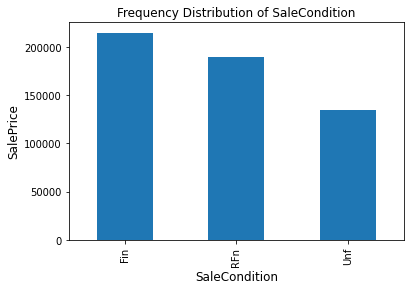

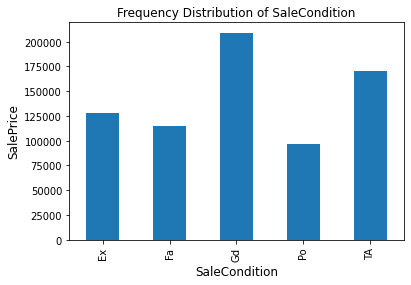

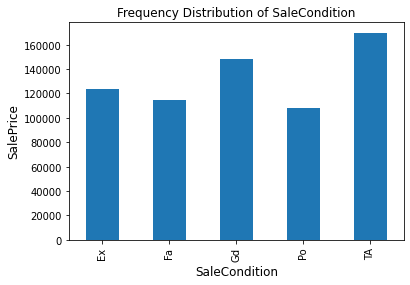

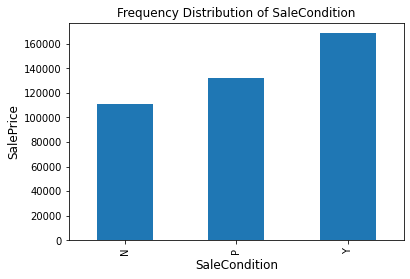

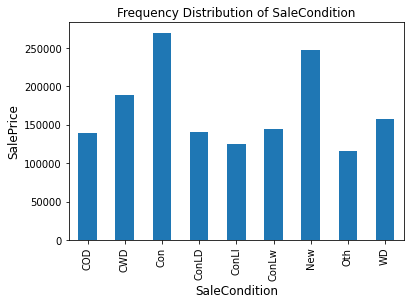

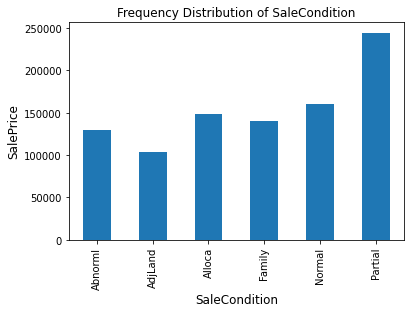

In [31]:
for col in df_categorical:    
    cat_dt=df.copy()
    cat_dt.groupby(col)['SalePrice'].median().plot.bar()
    plt.title('Frequency Distribution of '+i)
    plt.ylabel('SalePrice', fontsize=12)
    plt.xlabel(i, fontsize=12)
    plt.show()

### Check for unique values in Categorical Variables

In [32]:
uniqueVal=[]
for column in df_categorical:
    uniqueVal=df_categorical[column].value_counts()
    print('{}: {}'.format(column,df_categorical[column].nunique()) +"\n",uniqueVal)
    

MSZoning: 5
 RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Street: 2
 Pave    1454
Grvl       6
Name: Street, dtype: int64
LotShape: 4
 Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
LandContour: 4
 Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
Utilities: 2
 AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
LotConfig: 5
 Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
LandSlope: 3
 Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
Neighborhood: 25
 NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenke

### Checking Rare Values in Categorical Feature

In [33]:
total_house=df.shape[0]
def rare_labels_grouping(catList,threshold):
    for cat in catList:
        temp= catList[cat].value_counts()/total_house
        t=temp[temp>threshold].index
        catList[cat]=np.where(catList[cat].isin(t),catList[cat],'rare') #isin is pandas builtin selectors,i.e.isin is lets you select data whose value "isin" a list of values.
        return catList

In [34]:
rare_labels_grouping(df_categorical,0.01)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal


### Typecast categorical features to a category dtype for faster execution

In [35]:
#Typecast categorical features to a category dtype because they make the operations on such columns much faster than the object dtype.
#You can do the typecasting by using .astype() 
for col in df_categorical:    
    #df_categorical_lc = df_categorical.copy()
    df_categorical[col] = df_categorical[col].astype('category')

In [36]:
print(df_categorical.dtypes)

MSZoning         category
Street           category
LotShape         category
LandContour      category
Utilities        category
LotConfig        category
LandSlope        category
Neighborhood     category
Condition1       category
Condition2       category
BldgType         category
HouseStyle       category
RoofStyle        category
RoofMatl         category
Exterior1st      category
Exterior2nd      category
MasVnrType       category
ExterQual        category
ExterCond        category
Foundation       category
BsmtQual         category
BsmtCond         category
BsmtExposure     category
BsmtFinType1     category
BsmtFinType2     category
Heating          category
HeatingQC        category
CentralAir       category
Electrical       category
KitchenQual      category
Functional       category
FireplaceQu      category
GarageType       category
GarageFinish     category
GarageQual       category
GarageCond       category
PavedDrive       category
SaleType         category
SaleConditio

### Categorical to Numerical

In [37]:
from sklearn.preprocessing import LabelEncoder

for col in df_categorical:
    lb_make = LabelEncoder()
    df_categorical[col] = lb_make.fit_transform(df_categorical[col])
    

In [38]:
df_categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,2,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,3,2,5,1,0,1,4,2,6,2,1,1,4,4,2,8,4
1,2,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,2,3,4,1,2,3,1,0,5,1,0,1,4,3,6,4,1,1,4,4,2,8,4
2,2,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,2,2,5,1,0,1,4,2,6,4,1,1,4,4,2,8,4
3,2,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,2,3,4,0,3,1,3,0,5,1,2,1,4,2,6,2,5,2,4,4,2,8,0
4,2,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1,2,4,2,2,3,0,2,5,1,0,1,4,2,6,4,1,1,4,4,2,8,4


In [39]:
#Temporal variables->with time and date
temporal_feature=[]
for col in df_numerical:
    if("Year" in col or "Yr" in col):
        temporal_feature.append(col)

In [40]:
temporal_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [41]:
for feature in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    df_numerical[feature]=df_numerical['YrSold']-df_numerical[feature]

In [42]:
df_numerical

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,5,5,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,5.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,31,31,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,31.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,7,6,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,7.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,91,36,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,8.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,8,8,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,8.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,8,7,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,8.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,32,22,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,32.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,69,4,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,69.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,60,14,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,60.0,1,240,366,0,112,0,0,0,0,4,2010,142125


## Checking for Outliers

In [43]:
from scipy import stats

df_all_num = df.select_dtypes(include=['int64','float64'])
skew_features = df_all_num.apply(lambda x: stats.skew(x)).sort_values(ascending=False)
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
OpenPorchSF       2.361912
SalePrice         1.880941
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
OverallCond       0.692355
TotRmsAbvGrd      0.675646
HalfBath          0.675203
Fireplaces        0.648898
BsmtFullBath      0.595454
OverallQual       0.216721
MoSold            0.211835
BedroomAbvGr      0.211572
GarageArea        0.179796
YrSold            0.096170
FullBath          0.036524
Id                0.000000
GarageCars       -0.342197
YearRemodAdd     -0.503044
YearBuilt        -0.612831
LotFrontage            NaN
MasVnrArea             NaN
G

In [44]:
from scipy import stats
for column in df_numerical:    
    skewed_features=stats.skew(df_numerical[column]),column
    print(skewed_features)

(1.4062101115313512, 'MSSubClass')
(2.382499177054863, 'LotFrontage')
(12.195142125084478, 'LotArea')
(0.2167209765258641, 'OverallQual')
(0.6923552135520978, 'OverallCond')
(0.6084043348035013, 'YearBuilt')
(0.5019726289409677, 'YearRemodAdd')
(2.6736612614758912, 'MasVnrArea')
(1.6837708962341815, 'BsmtFinSF1')
(4.250888017057445, 'BsmtFinSF2')
(0.9193227015582005, 'BsmtUnfSF')
(1.522688086978629, 'TotalBsmtSF')
(1.3753417421837937, '1stFlrSF')
(0.8121942731961613, '2ndFlrSF')
(9.002080417658552, 'LowQualFinSF')
(1.365155954773434, 'GrLivArea')
(0.5954540376067279, 'BsmtFullBath')
(4.0991856695420035, 'BsmtHalfBath')
(0.0365239844325461, 'FullBath')
(0.6752028347742616, 'HalfBath')
(0.21157244158228097, 'BedroomAbvGr')
(4.483784093860484, 'KitchenAbvGr')
(0.6756457673102017, 'TotRmsAbvGrd')
(0.6488976310170327, 'Fireplaces')
(0.6583566965607441, 'GarageYrBlt')
(-0.34219689543081294, 'GarageCars')
(0.1797959420587727, 'GarageArea')
(1.5397916998042025, 'WoodDeckSF')
(2.361911928568972

In [45]:
for column in df_numerical.columns: 
    print(column, df_numerical[column].isnull().sum())  #check null value for each column and return of total no of null value      

MSSubClass 0
LotFrontage 0
LotArea 0
OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
MasVnrArea 0
BsmtFinSF1 0
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0
1stFlrSF 0
2ndFlrSF 0
LowQualFinSF 0
GrLivArea 0
BsmtFullBath 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
TotRmsAbvGrd 0
Fireplaces 0
GarageYrBlt 0
GarageCars 0
GarageArea 0
WoodDeckSF 0
OpenPorchSF 0
EnclosedPorch 0
3SsnPorch 0
ScreenPorch 0
PoolArea 0
MiscVal 0
MoSold 0
YrSold 0
SalePrice 0


In [46]:
for col in df_numerical:
    corr=col  ,df_numerical[col].corr(df_numerical['SalePrice'])
    print(corr)

('MSSubClass', -0.08428413512659531)
('LotFrontage', 0.3349008515405508)
('LotArea', 0.2638433538714056)
('OverallQual', 0.7909816005838044)
('OverallCond', -0.07785589404867803)
('YearBuilt', -0.523350417546816)
('YearRemodAdd', -0.5090787380156292)
('MasVnrArea', 0.47524131677366865)
('BsmtFinSF1', 0.3864198062421532)
('BsmtFinSF2', -0.011378121450215125)
('BsmtUnfSF', 0.21447910554696892)
('TotalBsmtSF', 0.6135805515591956)
('1stFlrSF', 0.6058521846919147)
('2ndFlrSF', 0.3193338028320681)
('LowQualFinSF', -0.02560613000067959)
('GrLivArea', 0.7086244776126523)
('BsmtFullBath', 0.22712223313149382)
('BsmtHalfBath', -0.016844154297359016)
('FullBath', 0.5606637627484449)
('HalfBath', 0.2841076755947831)
('BedroomAbvGr', 0.16821315430073988)
('KitchenAbvGr', -0.13590737084214122)
('TotRmsAbvGrd', 0.5337231555820282)
('Fireplaces', 0.46692883675152724)
('GarageYrBlt', -0.4710316381130982)
('GarageCars', 0.6404091972583529)
('GarageArea', 0.6234314389183618)
('WoodDeckSF', 0.324413444568

In [47]:
cols_num_dis = [] # discrete numerical values
cols_num_con = [] # continuous numerical values

for i in df_numerical:
    if df_numerical[i].nunique()>12:
        cols_num_con.append(i)
    else:
        cols_num_dis.append(i)

In [48]:
cols_num_con

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

In [49]:
cols_num_dis

['OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'MoSold',
 'YrSold']

In [50]:
for i in cols_num_con:
    print(f'For {i} Skewness is {round(df[i].skew(),2)} and Kurtosis is {round(df[i].kurtosis(),2)}')

For MSSubClass Skewness is 1.41 and Kurtosis is 1.58
For LotFrontage Skewness is 2.16 and Kurtosis is 17.45
For LotArea Skewness is 12.21 and Kurtosis is 203.24
For YearBuilt Skewness is -0.61 and Kurtosis is -0.44
For YearRemodAdd Skewness is -0.5 and Kurtosis is -1.27
For MasVnrArea Skewness is 2.67 and Kurtosis is 10.08
For BsmtFinSF1 Skewness is 1.69 and Kurtosis is 11.12
For BsmtFinSF2 Skewness is 4.26 and Kurtosis is 20.11
For BsmtUnfSF Skewness is 0.92 and Kurtosis is 0.47
For TotalBsmtSF Skewness is 1.52 and Kurtosis is 13.25
For 1stFlrSF Skewness is 1.38 and Kurtosis is 5.75
For 2ndFlrSF Skewness is 0.81 and Kurtosis is -0.55
For LowQualFinSF Skewness is 9.01 and Kurtosis is 83.23
For GrLivArea Skewness is 1.37 and Kurtosis is 4.9
For GarageYrBlt Skewness is -0.65 and Kurtosis is -0.42
For GarageArea Skewness is 0.18 and Kurtosis is 0.92
For WoodDeckSF Skewness is 1.54 and Kurtosis is 2.99
For OpenPorchSF Skewness is 2.36 and Kurtosis is 8.49
For EnclosedPorch Skewness is 3.09

#checking our columns after outliers removal.
for i in cols_num_con:
    df_numerical[i] = np.log(df_numerical[i]+1)
    sns.histplot(df_numerical[i], kde=True)
    plt.show()

In [51]:
skewed_feature=['LotFrontage','LotArea','1stFlrSF','GrLivArea','SalePrice']
for col in skewed_feature:
    df_numerical[col]=np.log(df_numerical[col])

In [52]:
df_numerical.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,4.174387,9.041922,7,5,5,5,196.0,706,0,150,856,6.752270,854,0,7.444249,1,0,2,1,3,1,8,0,5.0,2,548,0,61,0,0,0,0,0,2,2008,12.247694
1,20,4.382027,9.169518,6,8,31,31,0.0,978,0,284,1262,7.140453,0,0,7.140453,0,1,2,0,3,1,6,1,31.0,2,460,298,0,0,0,0,0,0,5,2007,12.109011
2,60,4.219508,9.328123,7,5,7,6,162.0,486,0,434,920,6.824374,866,0,7.487734,1,0,2,1,3,1,6,1,7.0,2,608,0,42,0,0,0,0,0,9,2008,12.317167
3,70,4.094345,9.164296,7,5,91,36,0.0,216,0,540,756,6.867974,756,0,7.448334,1,0,1,0,3,1,7,1,8.0,3,642,0,35,272,0,0,0,0,2,2006,11.849398
4,60,4.430817,9.565214,8,5,8,8,350.0,655,0,490,1145,7.043160,1053,0,7.695303,1,0,2,1,4,1,9,1,8.0,3,836,192,84,0,0,0,0,0,12,2008,12.429216


In [53]:
result = pd.concat([df_numerical,df_categorical], axis=1)
result

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,4.174387,9.041922,7,5,5,5,196.0,706,0,150,856,6.752270,854,0,7.444249,1,0,2,1,3,1,8,0,5.0,2,548,0,61,0,0,0,0,0,2,2008,12.247694,2,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,3,2,5,1,0,1,4,2,6,2,1,1,4,4,2,8,4
1,20,4.382027,9.169518,6,8,31,31,0.0,978,0,284,1262,7.140453,0,0,7.140453,0,1,2,0,3,1,6,1,31.0,2,460,298,0,0,0,0,0,0,5,2007,12.109011,2,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,2,3,4,1,2,3,1,0,5,1,0,1,4,3,6,4,1,1,4,4,2,8,4
2,60,4.219508,9.328123,7,5,7,6,162.0,486,0,434,920,6.824374,866,0,7.487734,1,0,2,1,3,1,6,1,7.0,2,608,0,42,0,0,0,0,0,9,2008,12.317167,2,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,2,2,5,1,0,1,4,2,6,4,1,1,4,4,2,8,4
3,70,4.094345,9.164296,7,5,91,36,0.0,216,0,540,756,6.867974,756,0,7.448334,1,0,1,0,3,1,7,1,8.0,3,642,0,35,272,0,0,0,0,2,2006,11.849398,2,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,2,3,4,0,3,1,3,0,5,1,2,1,4,2,6,2,5,2,4,4,2,8,0
4,60,4.430817,9.565214,8,5,8,8,350.0,655,0,490,1145,7.043160,1053,0,7.695303,1,0,2,1,4,1,9,1,8.0,3,836,192,84,0,0,0,0,0,12,2008,12.429216,2,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1,2,4,2,2,3,0,2,5,1,0,1,4,2,6,4,1,1,4,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,4.127134,8.976768,6,5,8,7,0.0,0,0,953,953,6.859615,694,0,7.406711,0,0,2,1,3,1,7,1,8.0,2,460,0,40,0,0,0,0,0,8,2007,12.072541,2,1,3,3,0,4,0,8,2,2,0,5,1,1,12,13,2,3,4,2,2,3,3,5,5,1,0,1,4,3,6,4,1,1,4,4,2,8,4
1456,20,4.442651,9.486076,6,6,32,22,119.0,790,163,589,1542,7.636752,0,0,7.636752,1,0,2,0,3,1,7,2,32.0,2,500,349,0,0,0,0,0,0,2,2010,12.254863,2,1,3,3,0,4,0,14,2,2,0,2,1,1,9,10,3,3,4,1,2,3,3,0,4,1,4,1,4,3,2,4,1,2,4,4,2,8,4
1457,70,4.189655,9.109636,7,9,69,4,0.0,275,0,877,1152,7.080026,1152,0,7.757906,0,0,2,0,4,1,9,2,69.0,1,252,0,60,0,0,0,0,2500,5,2010,12.493130,2,1,3,3,0,4,0,6,2,2,0,5,1,1,5,5,2,0,2,4,3,1,3,2,5,1,0,1,4,2,6,2,1,1,4,4,2,8,4
1458,20,4.219508,9.181632,5,6,60,14,0.0,49,1029,0,1078,6.982863,0,0,6.982863,1,0,1,0,2,1,5,0,60.0,1,240,366,0,112,0,0,0,0,4,2010,11.864462,2,1,3,3,0,4,0,12,2,2,0,2,3,1,8,8,2,3,4,1,3,3,2,2,4,1,2,1,0,2,6,2,1,2,4,4,2,8,4


In [54]:
result.shape

(1460, 76)

In [55]:
result.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
                ..
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
Length: 76, dtype: int64

In [56]:
result.SalePrice

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

### Scaling

In [57]:
scaling_feature=[col for col in result.columns if col not in ['SalePrice']]
print(scaling_feature)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'Paved

In [58]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
scalerTransformed=scalar.fit_transform(result[scaling_feature])
print(scalerTransformed)

[[0.23529412 0.41820812 0.3663439  ... 1.         1.         0.8       ]
 [0.         0.49506375 0.39131677 ... 1.         1.         0.8       ]
 [0.23529412 0.434909   0.4223585  ... 1.         1.         0.8       ]
 ...
 [0.29411765 0.42385922 0.37959669 ... 1.         1.         0.8       ]
 [0.         0.434909   0.39368765 ... 1.         1.         0.8       ]
 [0.         0.47117546 0.39806941 ... 1.         1.         0.8       ]]


In [59]:
# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([result[['SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scalerTransformed, columns=scaling_feature)],
                    axis=1)

In [60]:
data.head()

,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,12.247694,0.235294,0.418208,0.366344,0.666667,0.500,0.036765,0.098361,0.12250,0.125089,0.0,0.064212,0.140098,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.500000,0.000000,0.046729,0.50,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,0.5,1.0,1.0,1.0,0.0,1.0,0.0,0.208333,0.250,0.285714,0.0,0.714286,0.2,0.142857,0.857143,0.866667,0.333333,0.666667,1.0,0.4,0.666667,1.000000,1.000000,0.4,1.0,0.2,0.0,1.0,1.0,0.666667,1.0,0.5,0.2,0.5,1.0,1.0,1.0,1.0,0.8
1,12.109011,0.000000,0.495064,0.391317,0.555556,0.875,0.227941,0.524590,0.00000,0.173281,0.0,0.121575,0.206547,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,0.289720,0.50,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25,0.5,1.0,1.0,1.0,0.0,0.5,0.0,1.000000,0.125,0.285714,0.0,0.285714,0.2,0.142857,0.571429,0.533333,0.666667,1.000000,1.0,0.2,0.666667,1.000000,0.333333,0.0,1.0,0.2,0.0,1.0,1.0,1.000000,1.0,1.0,0.2,0.5,1.0,1.0,1.0,1.0,0.8
2,12.317167,0.235294,0.434909,0.422359,0.666667,0.500,0.051471,0.114754,0.10125,0.086109,0.0,0.185788,0.150573,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.333333,0.333333,0.065421,0.50,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50,0.5,1.0,0.0,1.0,0.0,1.0,0.0,0.208333,0.250,0.285714,0.0,0.714286,0.2,0.142857,0.857143,0.866667,0.333333,0.666667,1.0,0.4,0.666667,1.000000,0.666667,0.4,1.0,0.2,0.0,1.0,1.0,0.666667,1.0,1.0,0.2,0.5,1.0,1.0,1.0,1.0,0.8
3,11.849398,0.294118,0.388581,0.390295,0.666667,0.500,0.669118,0.606557,0.00000,0.038271,0.0,0.231164,0.123732,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.416667,0.333333,0.074766,0.75,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,0.00,0.5,1.0,0.0,1.0,0.0,0.0,0.0,0.250000,0.250,0.285714,0.0,0.714286,0.2,0.142857,0.928571,1.000000,0.666667,1.000000,1.0,0.0,1.000000,0.333333,1.000000,0.0,1.0,0.2,0.5,1.0,1.0,0.666667,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,12.429216,0.235294,0.513123,0.468761,0.777778,0.500,0.058824,0.147541,0.21875,0.116052,0.0,0.209760,0.187398,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.583333,0.333333,0.074766,0.75,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50,0.5,1.0,0.0,1.0,0.0,0.5,0.0,0.625000,0.250,0.285714,0.0,0.714286,0.2,0.142857,0.857143,0.866667,0.333333,0.666667,1.0,0.4,0.666667,1.000000,0.000000,0.4,1.0,0.2,0.0,1.0,1.0,0.666667,1.0,1.0,0.2,0.5,1.0,1.0,1.0,1.0,0.8


In [61]:
data.to_csv("hp_edited.csv")

In [62]:
data.shape

(1460, 76)

### Feature Selection

In [63]:
data=pd.read_csv("hp_edited.csv")
data.head()

,Unnamed: 0,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,0,12.247694,0.235294,0.418208,0.366344,0.666667,0.500,0.036765,0.098361,0.12250,0.125089,0.0,0.064212,0.140098,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.500000,0.000000,0.046729,0.50,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,0.5,1.0,1.0,1.0,0.0,1.0,0.0,0.208333,0.250,0.285714,0.0,0.714286,0.2,0.142857,0.857143,0.866667,0.333333,0.666667,1.0,0.4,0.666667,1.000000,1.000000,0.4,1.0,0.2,0.0,1.0,1.0,0.666667,1.0,0.5,0.2,0.5,1.0,1.0,1.0,1.0,0.8
1,1,12.109011,0.000000,0.495064,0.391317,0.555556,0.875,0.227941,0.524590,0.00000,0.173281,0.0,0.121575,0.206547,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,0.289720,0.50,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25,0.5,1.0,1.0,1.0,0.0,0.5,0.0,1.000000,0.125,0.285714,0.0,0.285714,0.2,0.142857,0.571429,0.533333,0.666667,1.000000,1.0,0.2,0.666667,1.000000,0.333333,0.0,1.0,0.2,0.0,1.0,1.0,1.000000,1.0,1.0,0.2,0.5,1.0,1.0,1.0,1.0,0.8
2,2,12.317167,0.235294,0.434909,0.422359,0.666667,0.500,0.051471,0.114754,0.10125,0.086109,0.0,0.185788,0.150573,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.333333,0.333333,0.065421,0.50,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50,0.5,1.0,0.0,1.0,0.0,1.0,0.0,0.208333,0.250,0.285714,0.0,0.714286,0.2,0.142857,0.857143,0.866667,0.333333,0.666667,1.0,0.4,0.666667,1.000000,0.666667,0.4,1.0,0.2,0.0,1.0,1.0,0.666667,1.0,1.0,0.2,0.5,1.0,1.0,1.0,1.0,0.8
3,3,11.849398,0.294118,0.388581,0.390295,0.666667,0.500,0.669118,0.606557,0.00000,0.038271,0.0,0.231164,0.123732,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.416667,0.333333,0.074766,0.75,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,0.00,0.5,1.0,0.0,1.0,0.0,0.0,0.0,0.250000,0.250,0.285714,0.0,0.714286,0.2,0.142857,0.928571,1.000000,0.666667,1.000000,1.0,0.0,1.000000,0.333333,1.000000,0.0,1.0,0.2,0.5,1.0,1.0,0.666667,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,4,12.429216,0.235294,0.513123,0.468761,0.777778,0.500,0.058824,0.147541,0.21875,0.116052,0.0,0.209760,0.187398,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.583333,0.333333,0.074766,0.75,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50,0.5,1.0,0.0,1.0,0.0,0.5,0.0,0.625000,0.250,0.285714,0.0,0.714286,0.2,0.142857,0.857143,0.866667,0.333333,0.666667,1.0,0.4,0.666667,1.000000,0.000000,0.4,1.0,0.2,0.0,1.0,1.0,0.666667,1.0,1.0,0.2,0.5,1.0,1.0,1.0,1.0,0.8


In [64]:
data.drop(labels="Unnamed: 0",axis=1,inplace=True)

### Lasso Regressor

In [65]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [66]:
X=data.drop("SalePrice",1)
y=data.SalePrice

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [67]:
X

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,0.235294,0.418208,0.366344,0.666667,0.500,0.036765,0.098361,0.122500,0.125089,0.000000,0.064212,0.140098,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.500000,0.000000,0.046729,0.50,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.00000,0.090909,0.50,0.5,1.0,1.0,1.0,0.0,1.0,0.0,0.208333,0.250,0.285714,0.0,0.714286,0.2,0.142857,0.857143,0.866667,0.333333,0.666667,1.0,0.4,0.666667,1.000000,1.000000,0.4,1.0,0.2,0.0,1.0,1.0,0.666667,1.000000,0.5,0.2,0.5,1.0,1.0,1.0,1.0,0.8
1,0.000000,0.495064,0.391317,0.555556,0.875,0.227941,0.524590,0.000000,0.173281,0.000000,0.121575,0.206547,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,0.289720,0.50,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.363636,0.25,0.5,1.0,1.0,1.0,0.0,0.5,0.0,1.000000,0.125,0.285714,0.0,0.285714,0.2,0.142857,0.571429,0.533333,0.666667,1.000000,1.0,0.2,0.666667,1.000000,0.333333,0.0,1.0,0.2,0.0,1.0,1.0,1.000000,1.000000,1.0,0.2,0.5,1.0,1.0,1.0,1.0,0.8
2,0.235294,0.434909,0.422359,0.666667,0.500,0.051471,0.114754,0.101250,0.086109,0.000000,0.185788,0.150573,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.333333,0.333333,0.065421,0.50,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.00000,0.727273,0.50,0.5,1.0,0.0,1.0,0.0,1.0,0.0,0.208333,0.250,0.285714,0.0,0.714286,0.2,0.142857,0.857143,0.866667,0.333333,0.666667,1.0,0.4,0.666667,1.000000,0.666667,0.4,1.0,0.2,0.0,1.0,1.0,0.666667,1.000000,1.0,0.2,0.5,1.0,1.0,1.0,1.0,0.8
3,0.294118,0.388581,0.390295,0.666667,0.500,0.669118,0.606557,0.000000,0.038271,0.000000,0.231164,0.123732,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.416667,0.333333,0.074766,0.75,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.00000,0.090909,0.00,0.5,1.0,0.0,1.0,0.0,0.0,0.0,0.250000,0.250,0.285714,0.0,0.714286,0.2,0.142857,0.928571,1.000000,0.666667,1.000000,1.0,0.0,1.000000,0.333333,1.000000,0.0,1.0,0.2,0.5,1.0,1.0,0.666667,1.000000,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,0.235294,0.513123,0.468761,0.777778,0.500,0.058824,0.147541,0.218750,0.116052,0.000000,0.209760,0.187398,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.583333,0.333333,0.074766,0.75,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.00000,1.000000,0.50,0.5,1.0,0.0,1.0,0.0,0.5,0.0,0.625000,0.250,0.285714,0.0,0.714286,0.2,0.142857,0.857143,0.866667,0.333333,0.666667,1.0,0.4,0.666667,1.000000,0.000000,0.4,1.0,0.2,0.0,1.0,1.0,0.666667,1.000000,1.0,0.2,0.5,1.0,1.0,1.0,1.0,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.235294,0.400718,0.353592,0.555556,0.500,0.058824,0.131148,0.000000,0.000000,0.000000,0.407962,0.155974,0.396777,0.336077,0.0,0.564433,0.000000,0.0,0.666667,0.5,0.375,0.333333,0.416667,0.333333,0.074766,0.50,0.324401,0.000000,0.073126,0.000000,0.0,0.0,0.0,0.00000,0.636364,0.25,0.5,1.0,1.0,1.0,0.0,1.0,0.0,0.333333,0.250,0.285714,0.0,0.714286,0.2,0.142857,0.

In [68]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)

In [69]:
X_train.shape

(1168, 75)

In [70]:
feature=X.columns
feature

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQua

In [71]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X, y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [72]:
feature_sel_model.get_support()

array([False, False, False,  True, False,  True,  True, False, False,
       False, False, False,  True, False, False,  True, False, False,
        True, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False, False,  True,
        True, False,  True, False, False,  True,  True, False, False,
        True, False,  True])

In [73]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 75
selected features: 21
features with coefficients shrank to zero: 54


In [74]:
selected_feat

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', 'GrLivArea',
       'FullBath', 'Fireplaces', 'GarageCars', 'MSZoning', 'LotShape',
       'BldgType', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC',
       'CentralAir', 'KitchenQual', 'GarageType', 'GarageFinish', 'PavedDrive',
       'SaleCondition'],
      dtype='object')

In [75]:
X=X[selected_feat]

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
train_X,test_X,train_y,test_y=train_test_split(X,y,random_state=42,test_size=0.3)
train_X.shape, test_X.shape

((1022, 21), (438, 21))

In [77]:
test_X.head()

,OverallQual,YearBuilt,YearRemodAdd,1stFlrSF,GrLivArea,FullBath,Fireplaces,GarageCars,MSZoning,LotShape,BldgType,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,CentralAir,KitchenQual,GarageType,GarageFinish,PavedDrive,SaleCondition
892,0.555556,0.316176,0.065574,0.439892,0.411200,0.333333,0.000000,0.25,0.50,1.0,0.0,1.0,1.000000,0.4,1.0,1.0,1.000000,0.2,0.5,1.0,0.8
1105,0.777778,0.117647,0.262295,0.568437,0.728921,0.666667,0.666667,0.50,0.50,0.0,0.0,0.0,0.000000,0.4,0.0,1.0,0.666667,0.2,0.5,1.0,0.8
413,0.444444,0.610294,1.000000,0.425446,0.397696,0.333333,0.333333,0.50,0.75,1.0,0.0,1.0,1.000000,1.0,0.5,1.0,1.000000,1.0,1.0,1.0,0.8
522,0.555556,0.433824,0.934426,0.416506,0.568066,0.666667,0.666667,0.50,0.75,1.0,0.0,1.0,1.000000,0.0,0.0,1.0,1.000000,1.0,1.0,1.0,0.8
1036,0.888889,0.014706,0.032787,0.597562,0.558586,0.666667,0.333333,0.75,0.50,0.0,0.0,0.0,0.333333,0.4,0.0,1.0,0.000000,0.2,0.0,1.0,0.8


In [78]:
test_X.to_csv("hp_testdata.csv")

In [79]:
test_y

892     11.947949
1105    12.691580
413     11.652687
522     11.976659
1036    12.661914
          ...    
331     11.842229
323     11.745425
650     12.235389
439     11.608236
798     13.091904
Name: SalePrice, Length: 438, dtype: float64

In [80]:
model=LinearRegression()
model.fit(train_X,train_y)

LinearRegression()

In [81]:
y_predict=model.predict(test_X)
r2_score(test_y,y_predict)

0.8856928945184549

In [82]:
model_rf=RandomForestRegressor()
model_rf.fit(train_X,train_y)

RandomForestRegressor()

In [83]:
y_predict=model_rf.predict(test_X)
r2_score(test_y,y_predict)

0.8881762721345199

In [84]:
param_grid = {'max_depth': [2,4,5]}
 
grid = GridSearchCV(model_rf, param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(train_X, train_y)
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END .......................max_depth=2;, score=0.699 total time=   0.2s
[CV 2/5] END .......................max_depth=2;, score=0.602 total time=   0.2s
[CV 3/5] END .......................max_depth=2;, score=0.625 total time=   0.2s
[CV 4/5] END .......................max_depth=2;, score=0.655 total time=   0.2s
[CV 5/5] END .......................max_depth=2;, score=0.688 total time=   0.2s
[CV 1/5] END .......................max_depth=4;, score=0.821 total time=   0.3s
[CV 2/5] END .......................max_depth=4;, score=0.719 total time=   0.2s
[CV 3/5] END .......................max_depth=4;, score=0.784 total time=   0.2s
[CV 4/5] END .......................max_depth=4;, score=0.802 total time=   0.3s
[CV 5/5] END .......................max_depth=4;, score=0.823 total time=   0.2s
[CV 1/5] END .......................max_depth=5;, score=0.838 total time=   0.3s
[CV 2/5] END .......................max_depth=5;,

In [85]:
model_rf=RandomForestRegressor(max_depth=5,min_samples_split=6,min_samples_leaf=1,n_estimators=400)
model_rf.fit(train_X,train_y)
y_predict_test_rf=model_rf.predict(test_X)
y_predict_train_rf=model_rf.predict(train_X)
print("Train accuracy ",r2_score(train_y,y_predict_train_rf))
print("Test accuracy ",r2_score(test_y,y_predict_test_rf))

Train accuracy  0.8866593514708432
Test accuracy  0.8549445566318539


In [86]:
model_xg=XGBRegressor()
model_xg.fit(train_X,train_y)
y_predict_xg=model_xg.predict(test_X)
r2_score(test_y,y_predict_xg)

[10:19:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8913712965583596

In [87]:
parameters = {'max_depth': [2,3,4],
              'subsample':[0.2,0.3],
              'min_child_weight': [2,3,4],
              'n_estimators': [100,200],
              'learning_rate':[0.05,0.06,0.1]}

xgb_grid = GridSearchCV(model_xg,
                        parameters,
                        cv = 5,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X,y)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[10:21:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.885815371848869
{'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 2, 'n_estimators': 200, 'subsample': 0.2}


In [88]:
model_xg=XGBRegressor(max_depth=2,subsample=0.2,min_child_weight=3,n_estimators=100,learning_rate=0.1)
model_xg.fit(train_X,train_y)
y_predict_test_xg=model_xg.predict(test_X)
y_predict_train_xg=model_xg.predict(train_X)
print("Train accuracy ",r2_score(train_y,y_predict_train_xg))
print("Test accuracy ",r2_score(test_y,y_predict_test_xg))


[10:21:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train accuracy  0.8908096980495089
Test accuracy  0.8843326514925519


### Support Vector Regressor

In [89]:
model_svr=SVR()
model_svr.fit(train_X,train_y)
y_predict_svr=model_svr.predict(test_X)
r2_score(test_y,y_predict_svr)

0.8642887291175316

In [90]:
param_grid = {'C': [1,2,3],
              'gamma': [0.02,0.03,0.04,0.05],
              'kernel': ['rbf']}
 
grid = GridSearchCV(model_svr, param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X, y)

# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .......C=1, gamma=0.02, kernel=rbf;, score=0.895 total time=   0.1s
[CV 2/5] END .......C=1, gamma=0.02, kernel=rbf;, score=0.852 total time=   0.1s
[CV 3/5] END .......C=1, gamma=0.02, kernel=rbf;, score=0.866 total time=   0.1s
[CV 4/5] END .......C=1, gamma=0.02, kernel=rbf;, score=0.868 total time=   0.1s
[CV 5/5] END .......C=1, gamma=0.02, kernel=rbf;, score=0.831 total time=   0.1s
[CV 1/5] END .......C=1, gamma=0.03, kernel=rbf;, score=0.900 total time=   0.1s
[CV 2/5] END .......C=1, gamma=0.03, kernel=rbf;, score=0.856 total time=   0.1s
[CV 3/5] END .......C=1, gamma=0.03, kernel=rbf;, score=0.872 total time=   0.1s
[CV 4/5] END .......C=1, gamma=0.03, kernel=rbf;, score=0.875 total time=   0.1s
[CV 5/5] END .......C=1, gamma=0.03, kernel=rbf;, score=0.833 total time=   0.1s
[CV 1/5] END .......C=1, gamma=0.04, kernel=rbf;, score=0.902 total time=   0.1s
[CV 2/5] END .......C=1, gamma=0.04, kernel=rbf;

In [91]:
print(grid.best_score_)

0.8747719203126157


In [92]:
model_svr=SVR(C=2,gamma=0.03,kernel='rbf')
model_svr.fit(train_X,train_y)
y_predict_test_svr=model_svr.predict(test_X)
y_predict_train_svr=model_svr.predict(train_X)
print("Train accuracy ",r2_score(train_y,y_predict_train_svr))
print("Test accuracy ",r2_score(test_y,y_predict_test_svr))


Train accuracy  0.8756955843373044
Test accuracy  0.8841342937009949


In [93]:
train_X.shape 

(1022, 21)